# Portfolio project - German Credit Scoring - UCI

Dataset *"German Credit Scoring"* provided by the users *"Elshan Kazim and Rugiyya Badirova"*, available on the Kaggle platform under the link:\
https://www.kaggle.com/datasets/elsnkazm/german-credit-scoring-data

The original dataset contains 1000 entries with 20 independent attributes and one target variable prepared by Prof. Hofmann, from the University of Hamburg and was first made available in 1994. In this dataset, each entry represents a person who has requested a credit by a bank. The aim of this project is to classify each person as having high or low credit risks according to the set of attributes, in other words, a very similar approach to the usual PD Models (probability of default).

## Knowing and "collecting" the data

Importing the most used libraries and the dataset

In [3661]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [3662]:
df = pd.read_csv('german_credit_cleaned.csv')

Displaying and knowing the dataset's structure

In [3664]:
pd.set_option('display.max_columns', None)
df.head(3) 

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,present_residence_since,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,target
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,1169,unknown_no_saving_acc,above_7y,4,male:single,none,4,real_estate,67,none,own,2,skilled_official,1,yes,yes,good
1,below_200,48,curr_loans_paid_duly,radio_tv,5951,below_100,below_4y,2,female:divorced_or_married,none,2,real_estate,22,none,own,1,skilled_official,1,no,yes,bad
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,2096,below_100,below_7y,2,male:single,none,3,real_estate,49,none,own,1,unskilled_resident,2,no,yes,good


Making some preliminary dataprocessing on the target variable

In [3666]:
df = df.rename(columns={'target': 'default'})

For the target variable we'll keep the usual approach on Logistic Regression Models where the interesting class assumes the value of "1", what meand being a low risk borrower, while the other classe wuill have the value of "0", meaning bein a high risk borrower.

In [3668]:
df['default'] = df['default'].map({'good':0, 'bad':1})

In [3669]:
df['default'] = df['default'].astype(int)

In [3670]:
df['default'].head(3)

0    0
1    1
2    0
Name: default, dtype: int32

.

Description of the dataset's variables:

- **checking_acc_status** - Status of existing checking account
- **duration** - Agreed Loan Duration in months
- **cred_hist** - Credit history status
- **purpose** - Loan Request Purpose
- **loan_amt** - Credit amount
- **saving_acc_bonds** - Savings account/bonds
- **present_employment_since** - Present employment since
- **installment_rate** - Installment rate in percentage of disposable income
- **personal_stat_gender** - Personal status and sex
- **other_debtors_guarantors** - co-applicant, guarantor, none
- **present_residence_since** - for how many years is living in the current residence
- **property** - if has ownership on the current risdence
- **age** - age
- **other_installment_plans** - bank, stores, none
- **housing** - rent, own, for_free
- **num_curr_loans** - Number of existing credits at this bank
- **job** - job 
- **num_people_provide_maint** - Number of people being liable to provide maintenance for
- **telephone** - has property of telephone
- **is_foreign_worker** - Indicates whether the individual is a foreign worker


As first considerations about the available variables we can point the following aspects out:

- Some variables present in this dataset could be considered as useful in 1994, but nowadays specially when thinking on ethical aspects, they are very questionable and we therefore decide to remove/recreate these for our modeling tasks due to ethical considerations, they are:
    - "personal_stat_gender": *gender* will be removed and *personal status* will be kept
    - "is_foreign_worker": will be removed

So first let's remove the column *is_foreign_worker*

In [3675]:
df = df.drop(columns='is_foreign_worker', axis=1)

And now let's rewrite the classe's descriptions on the variable *personal_stat_gender* and after that change also the variable name

In [3677]:
df['personal_stat_gender'].unique()

array(['male:single', 'female:divorced_or_married', 'male:divorced',
       'male:married_or_widowed'], dtype=object)

In [3678]:
new_variable_gender = {'male:single':'single', 
                       'female:divorced_or_married':'not_single', 
                       'male:divorced':'not_single', 
                       'male:married_or_widowed':'not_single'}

In [3679]:
df['personal_status'] = df['personal_stat_gender'].map(new_variable_gender)

In [3680]:
df = df.drop(columns='personal_stat_gender', axis=1)

Let's check if the changes are well succeed and then continue with our dataset exploration

In [3682]:
df.head(3)

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,other_debtors_guarantors,present_residence_since,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,default,personal_status
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,1169,unknown_no_saving_acc,above_7y,4,none,4,real_estate,67,none,own,2,skilled_official,1,yes,0,single
1,below_200,48,curr_loans_paid_duly,radio_tv,5951,below_100,below_4y,2,none,2,real_estate,22,none,own,1,skilled_official,1,no,1,not_single
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,2096,below_100,below_7y,2,none,3,real_estate,49,none,own,1,unskilled_resident,2,no,0,single


In [3683]:
df.shape

(1000, 20)

Looking at the data types and controlling if we have any null value

In [3685]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   checking_acc_status       1000 non-null   object
 1   duration                  1000 non-null   int64 
 2   cred_hist                 1000 non-null   object
 3   purpose                   1000 non-null   object
 4   loan_amt                  1000 non-null   int64 
 5   saving_acc_bonds          1000 non-null   object
 6   present_employment_since  1000 non-null   object
 7   installment_rate          1000 non-null   int64 
 8   other_debtors_guarantors  1000 non-null   object
 9   present_residence_since   1000 non-null   int64 
 10  property                  1000 non-null   object
 11  age                       1000 non-null   int64 
 12  other_installment_plans   1000 non-null   object
 13  housing                   1000 non-null   object
 14  num_curr_loans           

In [3686]:
df.isnull().values.any()

False

In [3687]:
df.isna().values.any()

False

For safety issues, let's just run the *dropna* method to assure we won't run in any problem

In [3689]:
df = df.dropna()

Last check will be if we have any duplicates

In [3691]:
df.duplicated().sum()

0

From the checks above we can see that the dataset is already clean in terms of not carrying any null value and duplicates. That's very good.

## Exploratory data analysis

Now let's get some statistics from the dataset

In [3695]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
loan_amt,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
num_curr_loans,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_people_provide_maint,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0


**Description of the statistics:**

**count -** number of valid registers in that column/variable;\
**mean -** mean of the numeric values from that column/variable;\
**std -** standard deviation of the numeric values from that column/variable;\
**min -** minimal value of the numeric values from that column/variable;\
**25% -** first quartile of the numeric values from that column/variable;\
**50% -** median of the numeric values from that column/variable;\
**75% -** third quartile of the numeric values from that column/variable;\
**max -** maximal value of the numeric values from that column/variable.

We well try to split the dataset into numeric and categorical columns to evaluate them separatedly and to create some automation on generating their visualizations.

In [3698]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols

['duration',
 'loan_amt',
 'installment_rate',
 'present_residence_since',
 'age',
 'num_curr_loans',
 'num_people_provide_maint',
 'default']

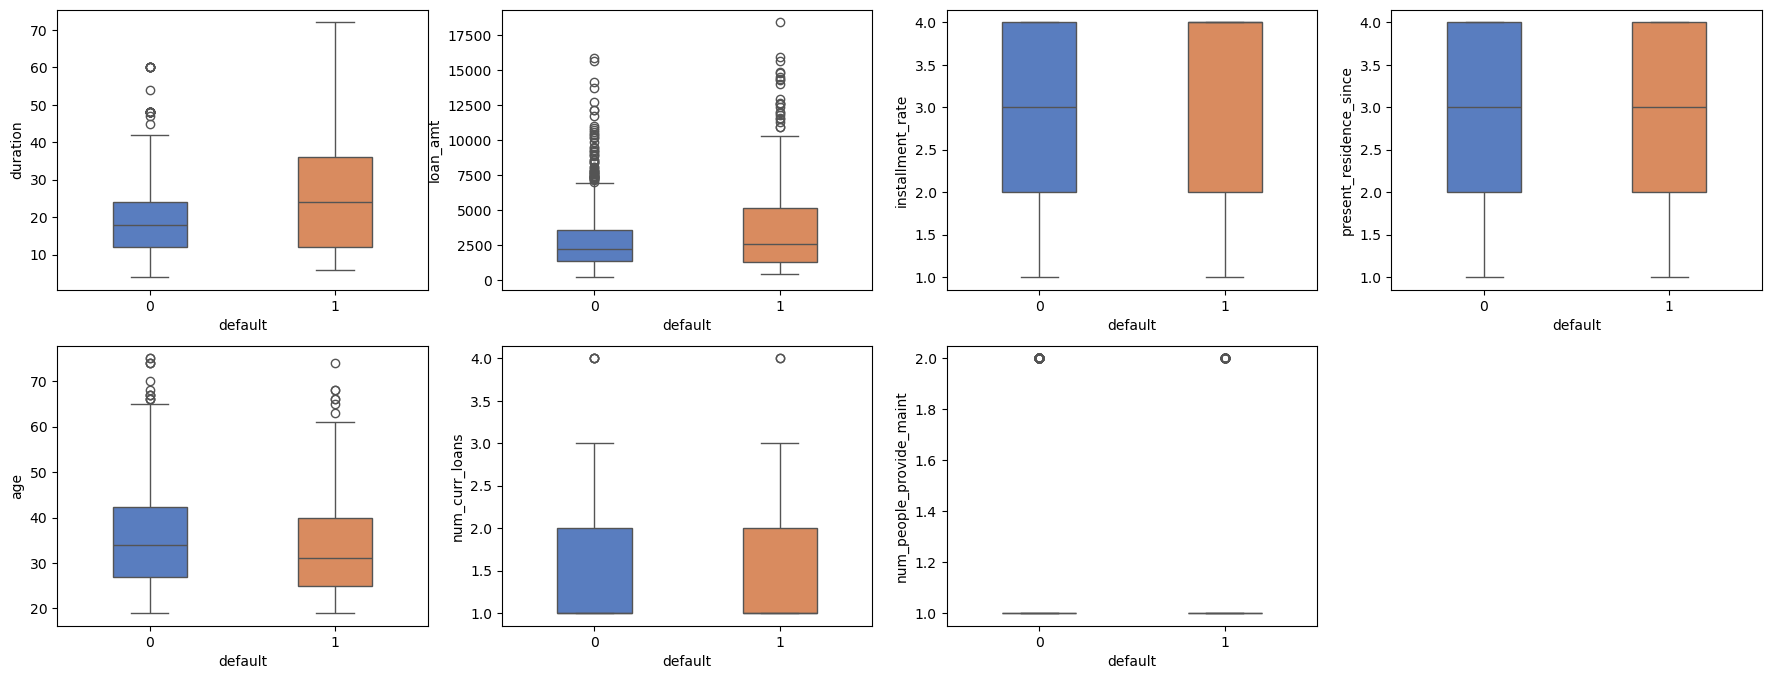

In [3699]:
plt.figure(figsize=(22,8))
counter=1

for i in num_cols:
    plt.subplot(2,4,counter)
    sns.boxplot(data=df, y=num_cols[counter-1], x='default', palette='muted', width=0.4)
    counter += 1
    if counter == int(len(num_cols)):
        break
        

Trying to interpret the above charts, we can start making some intuition about a probable profile that could be more risky for the institution:

- Seems like longer loans tend to have more cases of default;
- Seems like higher loan amounts tend to have more cases of default;
- Seems like younger people tend to be more risky and have higher probability of default

When evaluating the other variables, there's no big evidence of differences inside their data

Let's go on the same approach but now for all the categorical columns

In [3702]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()
object_cols

['checking_acc_status',
 'cred_hist',
 'purpose',
 'saving_acc_bonds',
 'present_employment_since',
 'other_debtors_guarantors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'personal_status']

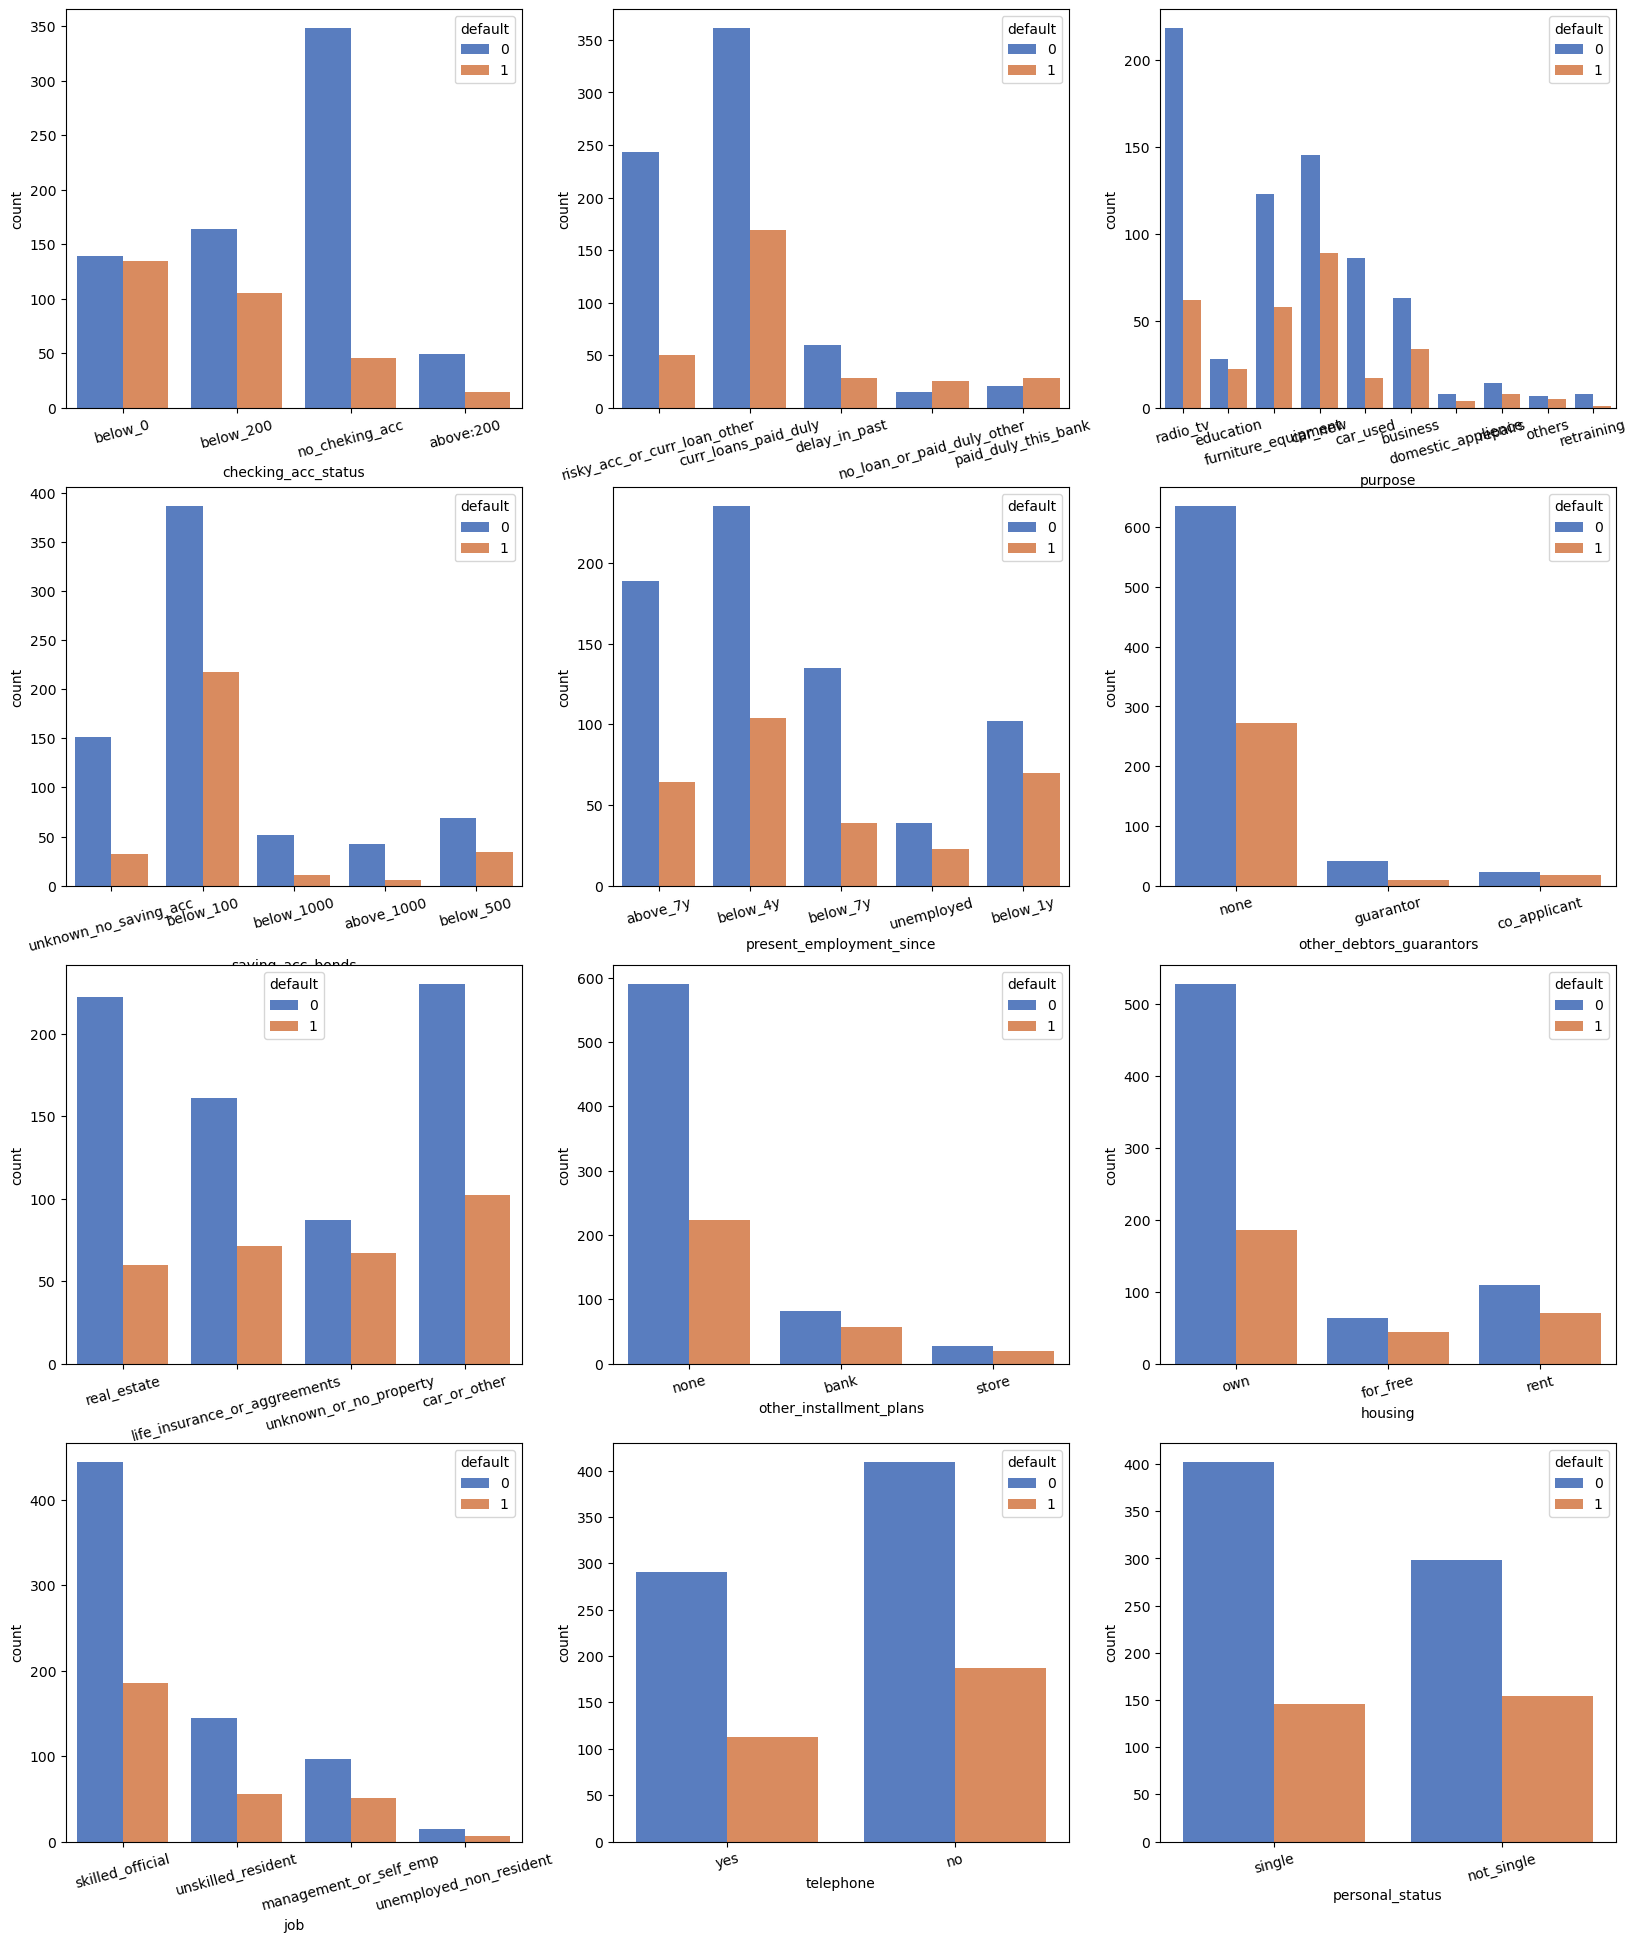

In [3703]:
plt.figure(figsize=(20,30))
counter=1

for i in object_cols:
    plt.subplot(5,3, counter)
    sns.countplot(x=object_cols[counter-1], data=df, hue=df['default'], palette='muted')
    plt.xticks(rotation=15)
    counter += 1

Now let's see how is the balance between the two classes of the target variabel

Some first interpretations on the available amount of data and information:

- Checking Acc Status: individuals with account balance below zero are even riskier than individuals without accounts- 
Credit His:- here seems that we have some inconsistencies as the individuals defined as good borrowers has higher proportion of default than the other variables. We suggest for safety purposes to exclude this variable from our analysis- 
Purpo: - seems like individuals who get the money for education purposes are a bit riskier than the others-  
Saving Acc Bo:s - no special consideratio- ns
Present Emplyment S:ce - unemployed individuals tend to be very risky and the one with less then one year employed a bit riskier than the oth- ers
Other Debtors Guara:ors - individuals without other guarantors tend to be ris- Property: iier
Individuals with no other properties tend to be ri- skier
Other Installmen:Plans - individuals with other plan tend to ibe - risker:ousing - individuals with own houses tend to be less - ris:er
Job - unemployed tends to be imuch risker and self employed tends to be a bit-  riskier:elephone - no special consi- derations
Pers:al status - not single individuals tend to be riskier

Off course all the assumptions we make here are just indicativer that lateron needs to be confirmed via metrics and statistical techniques.

In [3706]:
df = df.drop(columns='cred_hist', axis=1)

Now let's check for the class imabalance

In [3708]:
df['default'].value_counts()

default
0    700
1    300
Name: count, dtype: int64

As a rule of thumb, we can consider that a class distribution where the minority class constitutes at least 20-30% of the total dataset is generally manageable by most machine learning models without requiring balancing techniques, therefore we're not going to perform any over or undersampling on our data

## Data preprocessing - Discrete variables with hierarchy

Before start doing many transformation on the data, let's make a safety copy on that to have no risk of loing information and call for the library we'll need to perform label encoding

In [3712]:
df_backup = df.copy()

Label encoding in the variables with hierarchical relation among the variable's classes.

Here we have two important decisions to make:
- How is the ordering criteria: the classes with higher proportion of default will be ordered as riskier
- Following our Logistic Regression logic, higher risk means higher numerical values, that means that riskier classes will be ordered with higher number values 

In [3714]:
from sklearn.preprocessing import OrdinalEncoder

**checking_acc_status**

In [3716]:
df['checking_acc_status'].unique()

array(['below_0', 'below_200', 'no_cheking_acc', 'above:200'],
      dtype=object)

In [3717]:
dic_checking_acc_status = {'below_0': 'below_0', 
                           'below_200': 'below_200', 
                           'no_cheking_acc': 'no_check_acc', 
                           'above:200':'above_200'}

In [3718]:
df['checking_acc_status'] = df['checking_acc_status'].map(dic_checking_acc_status)

In [3719]:
hierarchy = ['no_check_acc', 'above_200', 'below_200', 'below_0']

In [3720]:
encoder = OrdinalEncoder(categories=[hierarchy], handle_unknown='use_encoded_value', unknown_value=-1)
df['checking_acc_status'] = df['checking_acc_status'].astype(str)
df['checking_acc_status'] = encoder.fit_transform(df[['checking_acc_status']])

**saving_acc_bonds**

In [3722]:
df['saving_acc_bonds'].unique()

array(['unknown_no_saving_acc', 'below_100', 'below_1000', 'above_1000',
       'below_500'], dtype=object)

In [3723]:
dic_saving_acc_bonds = {'unknown_no_saving_acc': 'no_acc', 
                        'below_100': 'below_100', 
                        'below_1000': 'below_1000',
                        'below_500': 'below_500',
                        'above_1000':'above_1000'}

In [3724]:
df['saving_acc_bonds'] = df['saving_acc_bonds'].map(dic_saving_acc_bonds)

In [3725]:
hierarchy = ['above_1000', 'no_acc', 'below_100', 'below_500', 'below_1000']

In [3726]:
encoder = OrdinalEncoder(categories=[hierarchy], handle_unknown='use_encoded_value', unknown_value=-1)
df['saving_acc_bonds'] = df['saving_acc_bonds'].astype(str)
df['saving_acc_bonds'] = encoder.fit_transform(df[['saving_acc_bonds']])

**present_employment_since**

In [3728]:
df['present_employment_since'].unique()

array(['above_7y', 'below_4y', 'below_7y', 'unemployed', 'below_1y'],
      dtype=object)

In [3729]:
hierarchy = ['above_7y', 'below_7y', 'below_4y', 'below_1y', 'unemployed']

In [3730]:
encoder = OrdinalEncoder(categories=[hierarchy], handle_unknown='use_encoded_value', unknown_value=-1)
df['present_employment_since'] = df['present_employment_since'].astype(str)
df['present_employment_since'] = encoder.fit_transform(df[['present_employment_since']])

**housing**

In [3732]:
df['housing'].unique()

array(['own', 'for_free', 'rent'], dtype=object)

In [3733]:
hierarchy = ['own', 'rent', 'for_free']

In [3734]:
encoder = OrdinalEncoder(categories=[hierarchy], handle_unknown='use_encoded_value', unknown_value=-1)
df['housing'] = df['housing'].astype(str)
df['housing'] = encoder.fit_transform(df[['housing']])

**job**

In [3736]:
df['job'].unique()

array(['skilled_official', 'unskilled_resident', 'management_or_self_emp',
       'unemployed_non_resident'], dtype=object)

In [3737]:
dic_job = {'skilled_official': 'skilled', 
           'unskilled_resident': 'unskilled', 
           'management_or_self_emp': 'self_emp',
           'unemployed_non_resident': 'unemployed'}

In [3738]:
df['job'] = df['job'].map(dic_job)

In [3739]:
hierarchy = ['skilled', 'unskilled', 'self_emp', 'unemployed']

In [3740]:
encoder = OrdinalEncoder(categories=[hierarchy], handle_unknown='use_encoded_value', unknown_value=-1)
df['job'] = df['job'].astype(str)
df['job'] = encoder.fit_transform(df[['job']])

**telephone -> internet**

In [3742]:
df['internet'] = df['telephone']
df = df.drop(columns='telephone')

In [3743]:
df['internet'].unique()

array(['yes', 'no'], dtype=object)

In [3744]:
hierarchy = ['yes', 'no']

In [3745]:
encoder = OrdinalEncoder(categories=[hierarchy], handle_unknown='use_encoded_value', unknown_value=-1)
df['internet'] = df['internet'].astype(str)
df['internet'] = encoder.fit_transform(df[['internet']])

## Data preprocessing - Discrete variables without hierarchy - WoE and IV

Here we'll automatize and optimize the classes definition through aplication of the WoE and IV statistical techniques and the evaluation it enable us to perform.

- **WoE (Weight of Evidence)**: Measures the strength of a predictor in distinguishing between classes (e.g., good vs. bad outcomes). It transforms a categorical or binned numerical variable into a continuous scale using the log ratio of probabilities.

<img width='300px' src='WoE.png' align='middle'>,
​
- **IV (Information Value)**: Quantifies the predictive power of a variable by summing the contribution of WoE for all bins:

<img width='300px' src='IV.png' align='middle'>

Higher IV values indicate stronger predictive power.

Here's a general guideline for interpreting Information Value (IV) in terms of the predictive power of a variable:

- IV < 0.02: Not predictive
- 0.02 ≤ IV < 0.1: Weak predictive power
- 0.1 ≤ IV < 0.3: Medium predictive power
- 0.3 ≤ IV < 0.5: Strong predictive power
- IV ≥ 0.5: Very strong predictive power

Function to automatize the calculations of Woe and IV

In [3750]:
def woe_discrete(dataset, discrete_variable_name, good_bad_variable):
    df_woe_iv = pd.concat([df[discrete_variable_name], good_bad_variable], axis=1)
    df_woe_iv = pd.concat([df_woe_iv.groupby(df_woe_iv.columns.values[0], as_index=False)[df_woe_iv.columns.values[1]].count(),
                      df_woe_iv.groupby(df_woe_iv.columns.values[0], as_index=False)[df_woe_iv.columns.values[1]].mean()], axis=1)
    df_woe_iv = df_woe_iv.iloc[:,[0, 1, 3]]
    df_woe_iv.columns = [df_woe_iv.columns.values[0], 'n_obs', 'prop_goods']
    df_woe_iv['prop_n_obs'] = df_woe_iv['n_obs'] / df_woe_iv['n_obs'].sum()
    df_woe_iv['n_good'] = df_woe_iv['prop_goods'] * df_woe_iv['n_obs']
    df_woe_iv['n_bad'] = (int(1)-df_woe_iv['prop_goods']) * df_woe_iv['n_obs']
    df_woe_iv['prop_n_good'] = df_woe_iv['n_good'] / df_woe_iv['n_good'].sum()
    df_woe_iv['prop_n_bad'] = df_woe_iv['n_bad'] / df_woe_iv['n_bad'].sum()
    df_woe_iv['WoE'] = np.log(df_woe_iv['prop_n_good'] / df_woe_iv['prop_n_bad'])
    df_woe_iv = df_woe_iv.sort_values(['WoE'])
    df_woe_iv = df_woe_iv.reset_index(drop=True)
    df_woe_iv['diff_prop_good'] = df_woe_iv['prop_goods'].diff().abs()
    df_woe_iv['diff_WoE'] = df_woe_iv['WoE'].diff().abs()
    df_woe_iv['IV'] = (df_woe_iv['prop_n_good'] - df_woe_iv['prop_n_bad']) * df_woe_iv['WoE']
    df_woe_iv['IV'] = df_woe_iv['IV'].sum()
    return df_woe_iv

Function to visualize its results

In [3752]:
def plot_by_woe(df_viz_woe, rotation_of_x_axis_labels = 0):
    x = np.array(df_viz_woe.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_viz_woe['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordinates variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_viz_woe.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_viz_woe.columns[0]))
    # Names the graph 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

Let's start now to apply our functions to each discrete variable

**purpose**

In [3755]:
df_temp = woe_discrete(df, 'purpose', df['default'])
df_temp

,purpose,n_obs,prop_goods,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,retraining,9,0.111111,0.009,1.0,8.0,0.003333,0.011429,-1.232144,NaN,NaN,0.169195
1,car_used,103,0.165049,0.103,17.0,86.0,0.056667,0.122857,-0.773836,0.053937,0.458308,0.169195
2,radio_tv,280,0.221429,0.280,62.0,218.0,0.206667,0.311429,-0.410063,0.056380,0.363773,0.169195
3,furniture_equipment,181,0.320442,0.181,58.0,123.0,0.193333,0.175714,0.095557,0.099013,0.505619,0.169195
4,domestic_applience,12,0.333333,0.012,4.0,8.0,0.013333,0.011429,0.154151,0.012891,0.058594,0.169195
5,business,97,0.350515,0.097,34.0,63.0,0.113333,0.090000,0.230524,0.017182,0.076373,0.169195
6,repairs,22,0.363636,0.022,8.0,14.0,0.026667,0.020000,0.287682,0.013121,0.057158,0.169195
7,car_new,234,0.380342,0.234,89.0,145.0,0.296667,0.207143,0.359200,0.016706,0.071518,0.169195
8,others,12,0.416667,0.012,5.0,7.0,0.016667,0.010000,0.510826,0.036325,0.151625,0.169195
9,education,50,0.440000,0.050,22.0,28.0,0.073333,0.040000,0.606136,0.023333,0.095310,0.169195


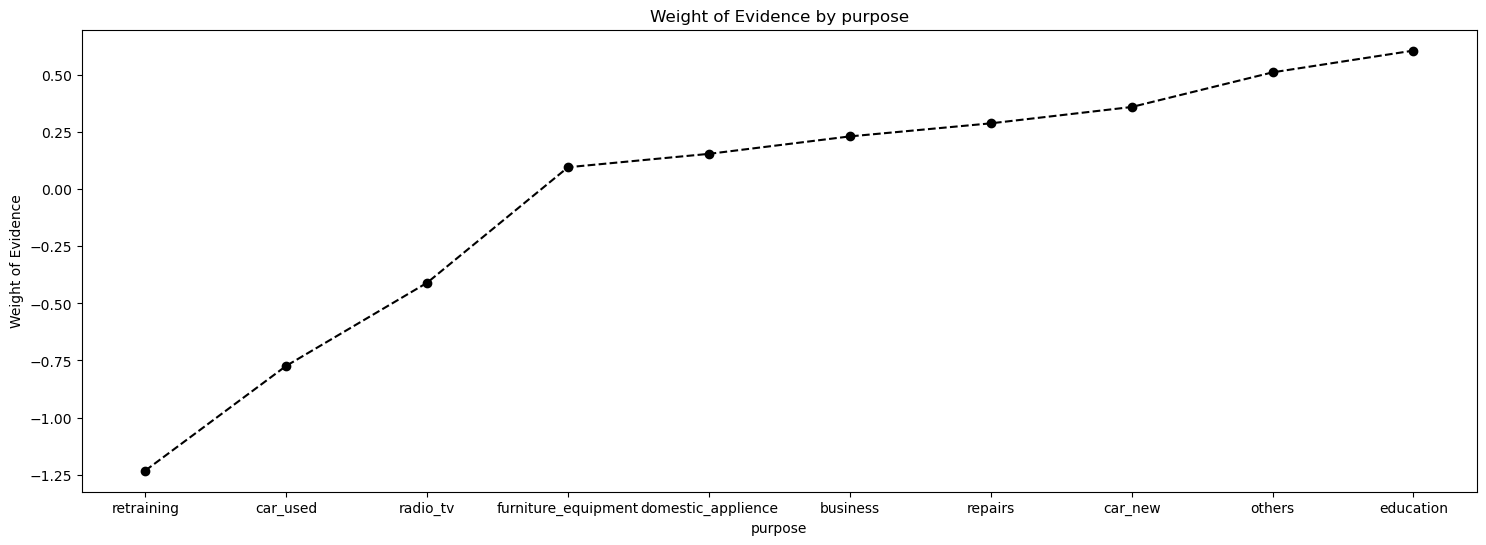

In [3756]:
plot_by_woe(df_temp)

As many of the classes don't have a considerable amount of registers and their WoE are very similar, thinking on statistical terms will be very useful for the model if we reduce and unify some of them onto just one class.

For this variable the IV looks like significant.

In [3758]:
df['purpose'] = df['purpose'].map({
    'education': 'car_new_others',
    'others': 'car_new_others',
    'car_new': 'car_new_others',
    'repairs': 'car_new_others',
    'business': 'car_new_others',
    'domestic_applience': 'car_new_others',
    'furniture_equipment': 'furniture_equipment',
    'radio_tv': 'radio_tv',
    'car_used': 'car_used',
    'retraining': 'retraining'
})

In [3759]:
df['purpose'].unique()

array(['radio_tv', 'car_new_others', 'furniture_equipment', 'car_used',
       'retraining'], dtype=object)

Checking if the changes made turned the variable to be more linear

In [3761]:
df_temp = woe_discrete(df, 'purpose', df['default'])
df_temp

,purpose,n_obs,prop_goods,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,retraining,9,0.111111,0.009,1.0,8.0,0.003333,0.011429,-1.232144,NaN,NaN,0.163171
1,car_used,103,0.165049,0.103,17.0,86.0,0.056667,0.122857,-0.773836,0.053937,0.458308,0.163171
2,radio_tv,280,0.221429,0.280,62.0,218.0,0.206667,0.311429,-0.410063,0.056380,0.363773,0.163171
3,furniture_equipment,181,0.320442,0.181,58.0,123.0,0.193333,0.175714,0.095557,0.099013,0.505619,0.163171
4,car_new_others,427,0.379391,0.427,162.0,265.0,0.540000,0.378571,0.355164,0.058949,0.259608,0.163171


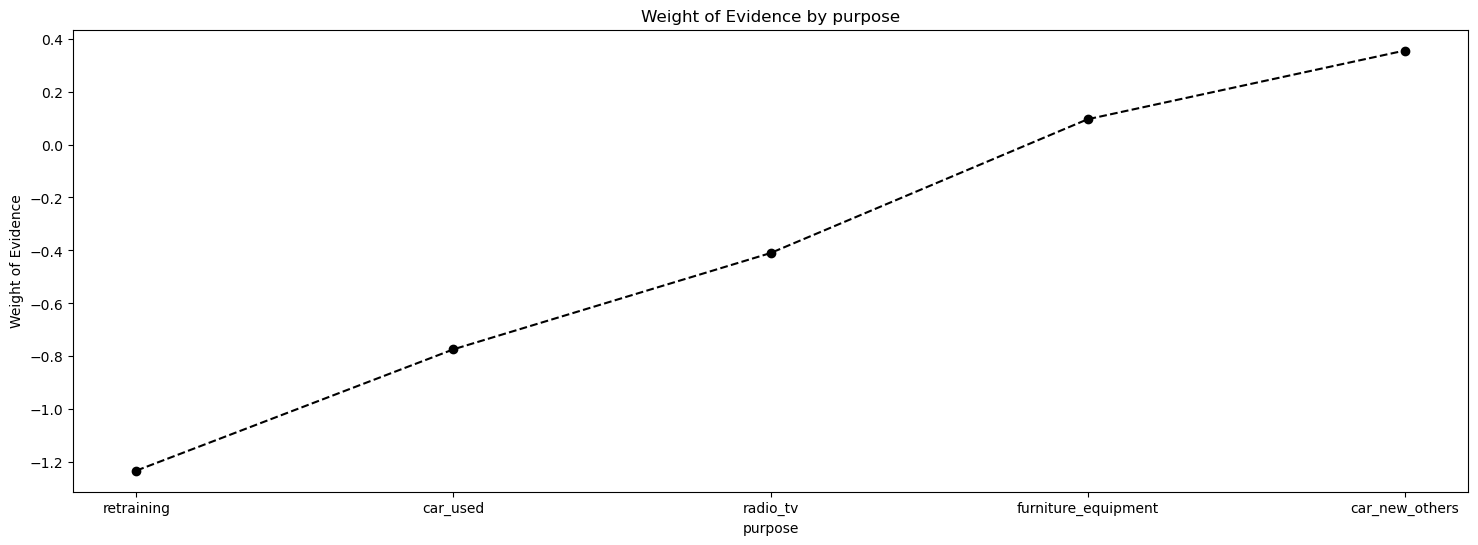

In [3762]:
plot_by_woe(df_temp)

**other_debtors_guarantors**

In [3764]:
df_temp = woe_discrete(df, 'other_debtors_guarantors', df['default'])
df_temp

,other_debtors_guarantors,n_obs,prop_goods,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,guarantor,52,0.192308,0.052,10.0,42.0,0.033333,0.060000,-0.587787,NaN,NaN,0.032019
1,none,907,0.299890,0.907,272.0,635.0,0.906667,0.907143,-0.000525,0.107582,0.587262,0.032019
2,co_applicant,41,0.439024,0.041,18.0,23.0,0.060000,0.032857,0.602175,0.139135,0.602700,0.032019


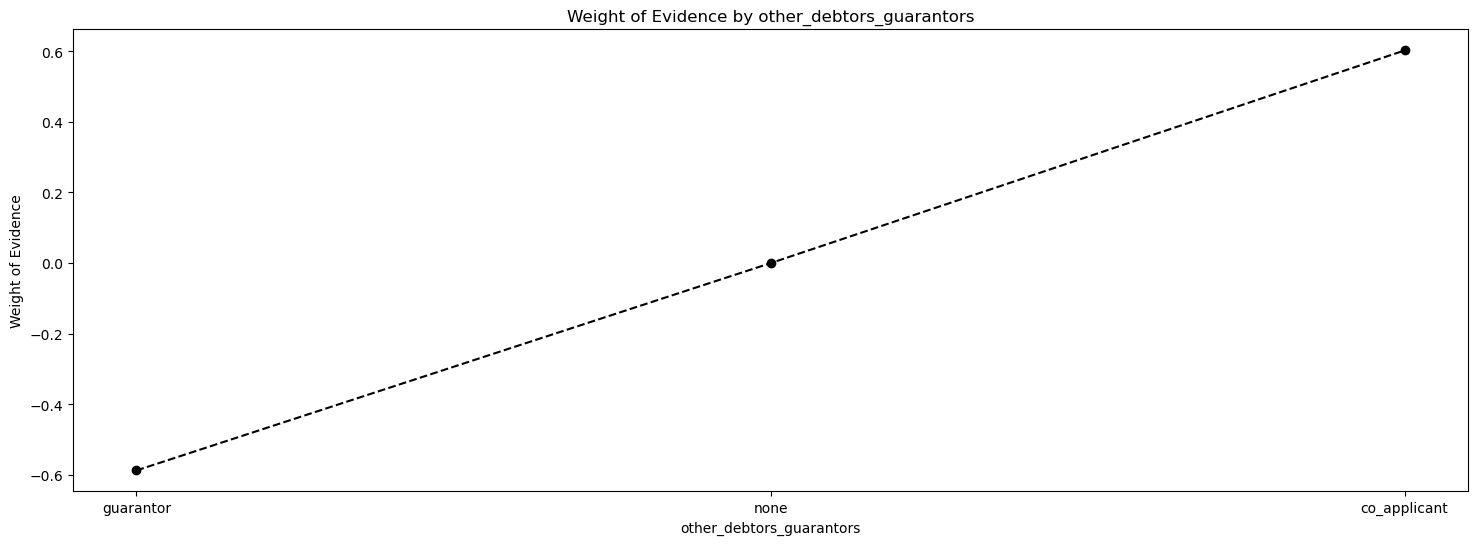

In [3765]:
plot_by_woe(df_temp)

In this case, seeing that the different classes have very distinctive values of WoE, we will let all of them in the model, even if the IV is not really significative.

**other_installment_plans**

In [3768]:
df_temp = woe_discrete(df, 'other_installment_plans', df['default'])
df_temp

,other_installment_plans,n_obs,prop_goods,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,none,814,0.275184,0.814,224.0,590.0,0.746667,0.842857,-0.121179,NaN,NaN,0.057615
1,store,47,0.404255,0.047,19.0,28.0,0.063333,0.040000,0.459532,0.129071,0.580711,0.057615
2,bank,139,0.410072,0.139,57.0,82.0,0.190000,0.117143,0.483630,0.005817,0.024098,0.057615


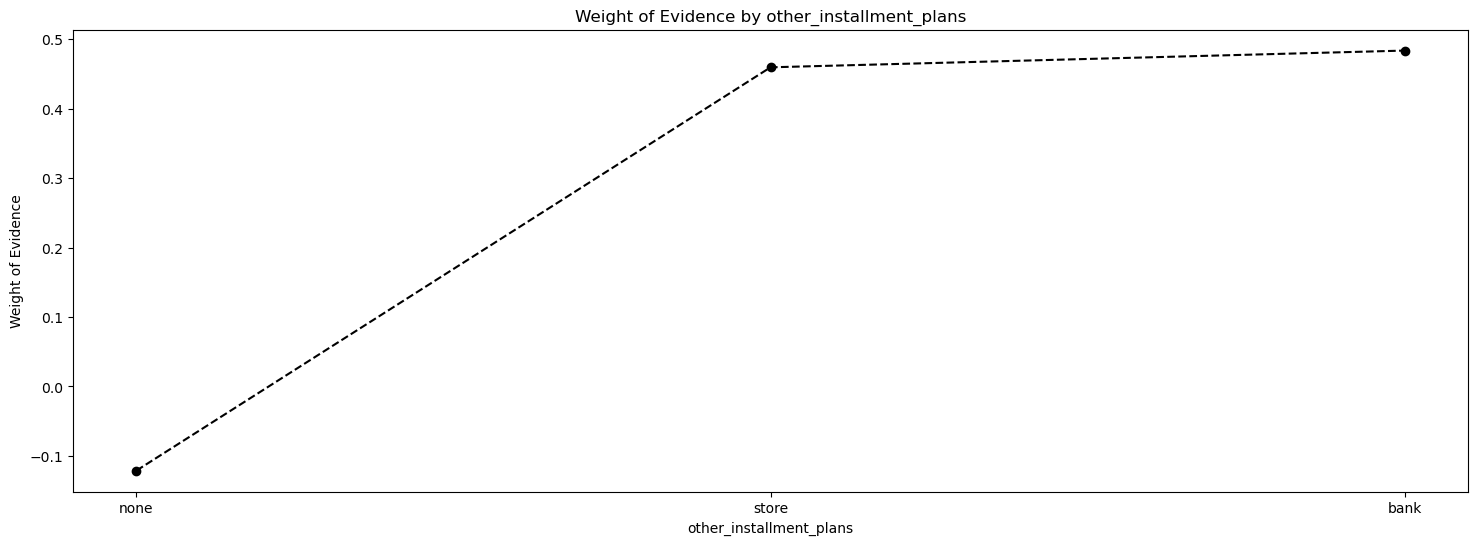

In [3769]:
plot_by_woe(df_temp)

In [3770]:
df['other_installment_plans'] = df['other_installment_plans'].map({
    'none': 'none',
    'store': 'store_bank',
    'bank': 'store_bank',
})

Checking if the changes made turned the variable to be more linear

In [3772]:
df_temp = woe_discrete(df, 'other_installment_plans', df['default'])
df_temp

,other_installment_plans,n_obs,prop_goods,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,none,814,0.275184,0.814,224.0,590.0,0.746667,0.842857,-0.121179,NaN,NaN,0.057592
1,store_bank,186,0.408602,0.186,76.0,110.0,0.253333,0.157143,0.477551,0.133418,0.598729,0.057592


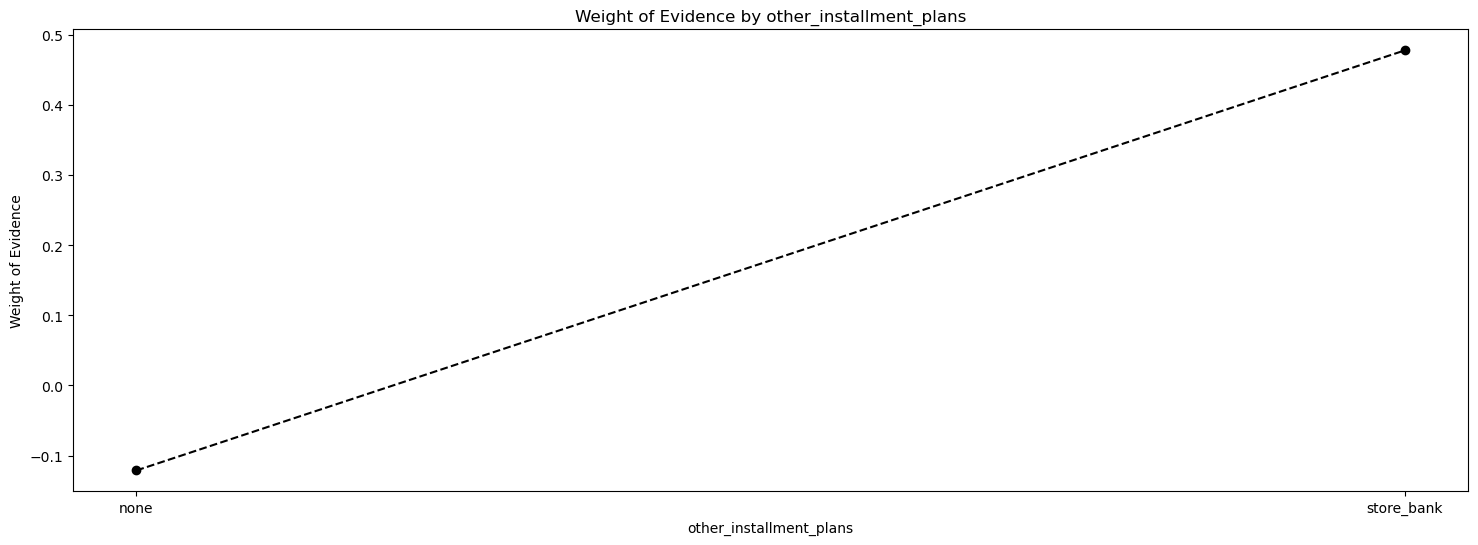

In [3773]:
plot_by_woe(df_temp)

Also here, seeing that the different classes have very distinctive values of WoE, we will let all of them in the model, but in this variable the IV is significative.

**property**

In [3776]:
df_temp = woe_discrete(df, 'property', df['default'])
df_temp

,property,n_obs,prop_goods,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,real_estate,282,0.212766,0.282,60.0,222.0,0.200000,0.317143,-0.461035,NaN,NaN,0.112638
1,life_insurance_or_aggreements,232,0.306034,0.232,71.0,161.0,0.236667,0.230000,0.028573,0.093269,0.489608,0.112638
2,car_or_other,332,0.307229,0.332,102.0,230.0,0.340000,0.328571,0.034191,0.001194,0.005618,0.112638
3,unknown_or_no_property,154,0.435065,0.154,67.0,87.0,0.223333,0.124286,0.586082,0.127836,0.551891,0.112638


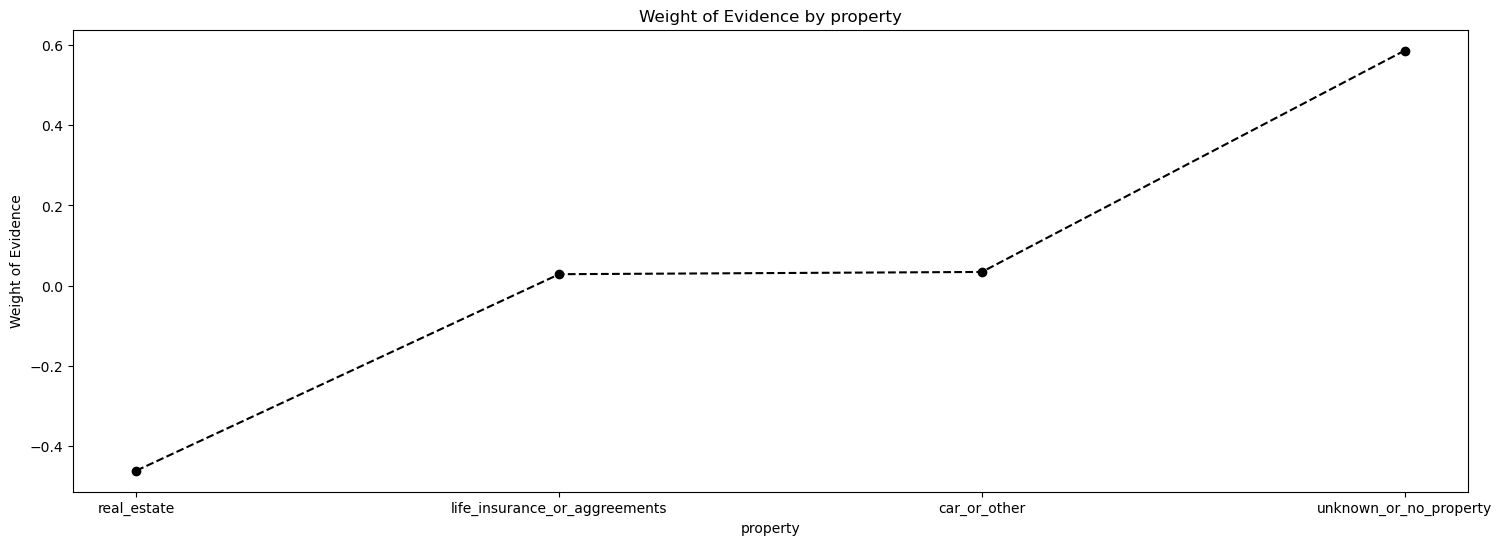

In [3777]:
plot_by_woe(df_temp)

Here we have two classes which can be unified since they have very similar WoE values.

In [3779]:
df['property'] = df['property'].map({
    'unknown_or_no_property': 'unknown_or_no_property',
    'car_or_other': 'car_or_life_insur',
    'life_insurance_or_aggreements': 'car_or_life_insur',
    'real_estate': 'real_estate'
})

In [3780]:
df['property'].unique()

array(['real_estate', 'car_or_life_insur', 'unknown_or_no_property'],
      dtype=object)

Checking if the changes made turned the variable to be more linear

In [3782]:
df_temp = woe_discrete(df, 'property', df['default'])
df_temp

,property,n_obs,prop_goods,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,real_estate,282,0.212766,0.282,60.0,222.0,0.200000,0.317143,-0.461035,NaN,NaN,0.112634
1,car_or_life_insur,564,0.306738,0.564,173.0,391.0,0.576667,0.558571,0.031882,0.093972,0.492917,0.112634
2,unknown_or_no_property,154,0.435065,0.154,67.0,87.0,0.223333,0.124286,0.586082,0.128327,0.554200,0.112634


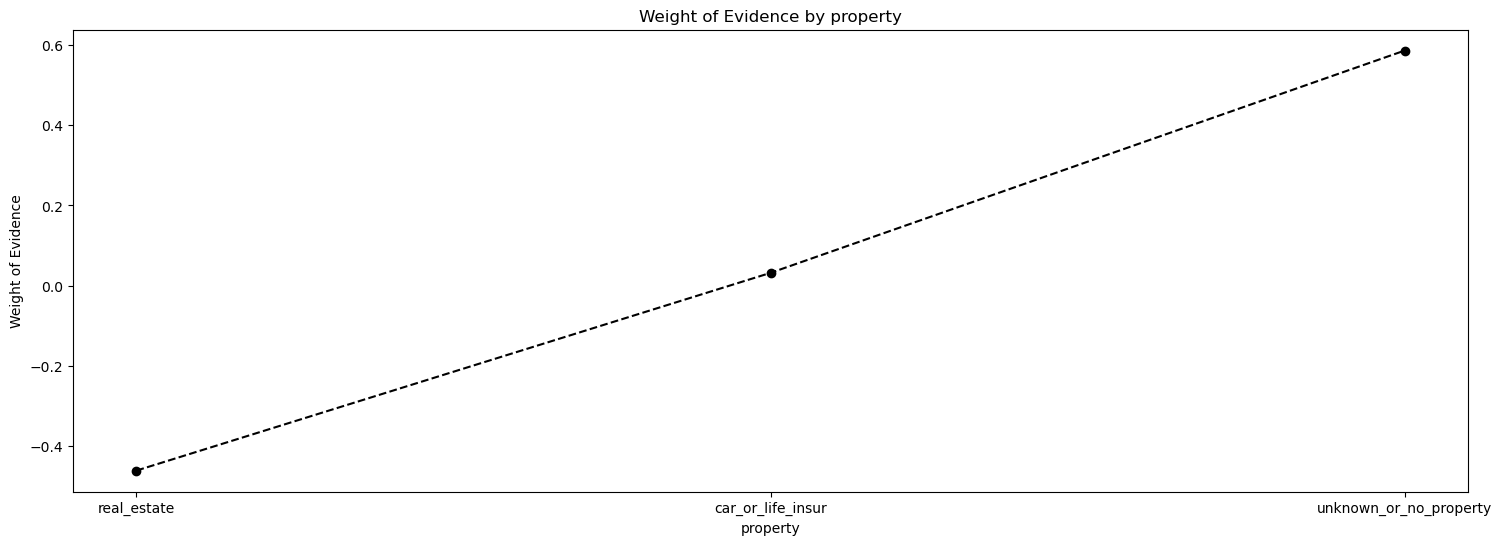

In [3783]:
plot_by_woe(df_temp)

### Variables where no data preprocessing is necessary

**personal_status**

In [3786]:
df['personal_status'].unique()

array(['single', 'not_single'], dtype=object)

And now finally let's call the one hot encoding method to transform the textual categoric information into boolean class organized variables

In [3788]:
df = pd.get_dummies(df, prefix_sep=':', columns=['purpose', 'other_debtors_guarantors', 'other_installment_plans', 'property', 'personal_status'], dtype='int')

## Data preprocessing - Grouping continuous variables - WoE and IV

As for the categorical variables, we want also for the numerical ones to be able to automatize the WoE and IV calculations, such as their visualizations. But in this case, due to the nature of the data (quantifiable), it will be necessary to make a light change in the function.

In [3791]:
def woe_ordered_continuous(dataset, continuous_variable_name, good_bad_variable):
    df_woe_iv = pd.concat([df[continuous_variable_name], good_bad_variable], axis=1)
    df_woe_iv = pd.concat([df_woe_iv.groupby(df_woe_iv.columns.values[0], as_index=False)[df_woe_iv.columns.values[1]].count(),
                      df_woe_iv.groupby(df_woe_iv.columns.values[0], as_index=False)[df_woe_iv.columns.values[1]].mean()], axis=1)
    df_woe_iv = df_woe_iv.iloc[:,[0, 1, 3]]
    df_woe_iv.columns = [df_woe_iv.columns.values[0], 'n_obs', 'prop_goods']
    df_woe_iv['prop_n_obs'] = df_woe_iv['n_obs'] / df_woe_iv['n_obs'].sum()
    df_woe_iv['n_good'] = df_woe_iv['prop_goods'] * df_woe_iv['n_obs']
    df_woe_iv['n_bad'] = (int(1)-df_woe_iv['prop_goods']) * df_woe_iv['n_obs']
    df_woe_iv['prop_n_good'] = df_woe_iv['n_good'] / df_woe_iv['n_good'].sum()
    df_woe_iv['prop_n_bad'] = df_woe_iv['n_bad'] / df_woe_iv['n_bad'].sum()
    df_woe_iv['WoE'] = np.log(df_woe_iv['prop_n_good'] / df_woe_iv['prop_n_bad'])
    #df_woe_iv = df_woe_iv.sort_values(['WoE'])
    #df_woe_iv = df_woe_iv.reset_index(drop=True)
    df_woe_iv['diff_prop_good'] = df_woe_iv['prop_goods'].diff().abs()
    df_woe_iv['diff_WoE'] = df_woe_iv['WoE'].diff().abs()
    df_woe_iv['IV'] = (df_woe_iv['prop_n_good'] - df_woe_iv['prop_n_bad']) * df_woe_iv['WoE']
    df_woe_iv['IV'] = df_woe_iv['IV'].sum()
    return df_woe_iv

**age**

In [3793]:
df_temp = woe_ordered_continuous(df, 'age', df['default'])
df_temp

,age,n_obs,prop_goods,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,19,2,0.500000,0.002,1.0,1.0,0.003333,0.001429,0.847298,NaN,NaN,inf
1,20,14,0.357143,0.014,5.0,9.0,0.016667,0.012857,0.259511,0.142857,0.587787,inf
2,21,14,0.357143,0.014,5.0,9.0,0.016667,0.012857,0.259511,0.000000,0.000000,inf
3,22,27,0.407407,0.027,11.0,16.0,0.036667,0.022857,0.472604,0.050265,0.213093,inf
4,23,48,0.416667,0.048,20.0,28.0,0.066667,0.040000,0.510826,0.009259,0.038221,inf
5,24,44,0.431818,0.044,19.0,25.0,0.063333,0.035714,0.572861,0.015152,0.062035,inf
6,25,41,0.463415,0.041,19.0,22.0,0.063333,0.031429,0.700694,0.031596,0.127833,inf
7,26,50,0.280000,0.050,14.0,36.0,0.046667,0.051429,-0.097164,0.183415,0.797858,inf
8,27,51,0.254902,0.051,13.0,38.0,0.043333,0.054286,-0.225339,0.025098,0.128175,inf
9,28,43,0.348837,0.043,15.0,28.0,0.050000,0.040000,0.223144,0.093935,0.448482,inf


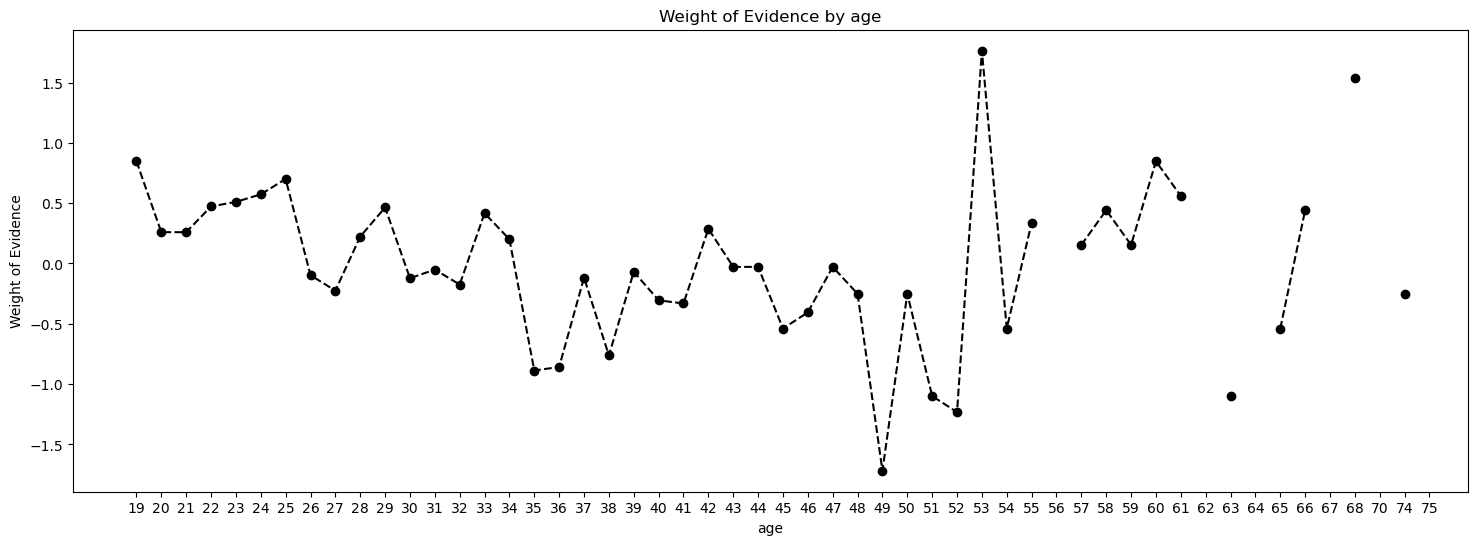

In [3794]:
plot_by_woe(df_temp)

The minimal representation of a class within a variable to still be considered significant can vary, but a common rule of thumb is that each category should have at least 5-10% of the total sample size. Because of that, we are going to join many different age values in groups.

In [3796]:
df['age'] = pd.cut(df['age'], bins=[18, 22, 24, 26, 28, 31, 34, 37, 41, 47, 59, 90], 
                   labels=['18 - 22', '22 - 24', '24 - 26', '26 - 28', '28 - 31',
                           '31 - 34', '34 - 37', '37 - 41', '41 - 47', '47 - 59', 'bigger 59'])

In [3797]:
df['age'].unique()

['bigger 59', '18 - 22', '47 - 59', '41 - 47', '34 - 37', ..., '24 - 26', '22 - 24', '31 - 34', '28 - 31', '37 - 41']
Length: 11
Categories (11, object): ['18 - 22' < '22 - 24' < '24 - 26' < '26 - 28' ... '37 - 41' < '41 - 47' < '47 - 59' < 'bigger 59']

In [3798]:
df_temp = woe_ordered_continuous(df, 'age', df['default'])
df_temp

,age,n_obs,prop_goods,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,18 - 22,57,0.385965,0.057,22.0,35.0,0.073333,0.050000,0.382992,NaN,NaN,0.10673
1,22 - 24,92,0.423913,0.092,39.0,53.0,0.130000,0.075714,0.540568,0.037948,0.157575,0.10673
2,24 - 26,91,0.362637,0.091,33.0,58.0,0.110000,0.082857,0.283362,0.061276,0.257205,0.10673
3,26 - 28,94,0.297872,0.094,28.0,66.0,0.093333,0.094286,-0.010152,0.064765,0.293515,0.10673
4,28 - 31,115,0.321739,0.115,37.0,78.0,0.123333,0.111429,0.101507,0.023867,0.111659,0.10673
5,31 - 34,99,0.333333,0.099,33.0,66.0,0.110000,0.094286,0.154151,0.011594,0.052644,0.10673
6,34 - 37,108,0.185185,0.108,20.0,88.0,0.066667,0.125714,-0.634307,0.148148,0.788457,0.10673
7,37 - 41,87,0.229885,0.087,20.0,67.0,0.066667,0.095714,-0.361662,0.044700,0.272644,0.10673
8,41 - 47,106,0.283019,0.106,30.0,76.0,0.100000,0.108571,-0.082238,0.053134,0.279424,0.10673
9,47 - 59,100,0.250000,0.100,25.0,75.0,0.083333,0.107143,-0.251314,0.033019,0.169076,0.10673


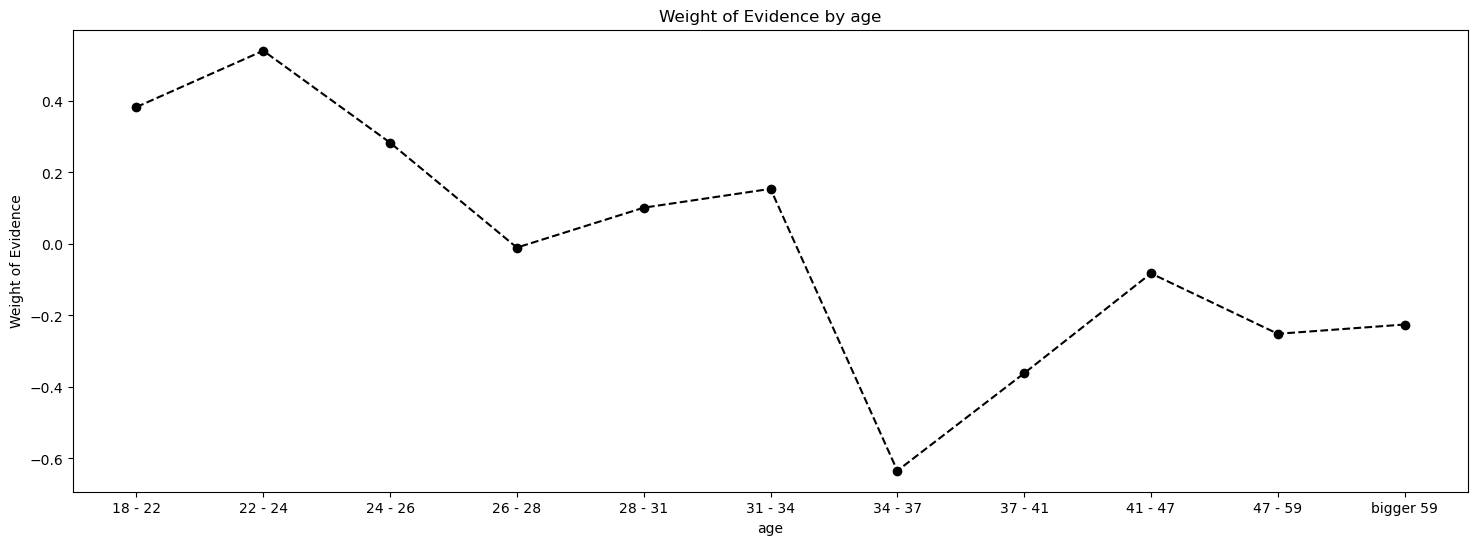

In [3799]:
plot_by_woe(df_temp)

In [3800]:
hierarchy = ['18 - 22', '22 - 24', '24 - 26', '26 - 28', '28 - 31', '31 - 34', '34 - 37', '37 - 41', '41 - 47', '47 - 59', 'bigger 59']

In [3801]:
encoder = OrdinalEncoder(categories=[hierarchy], handle_unknown='use_encoded_value', unknown_value=-1)
df['age'] = df['age'].astype(str)
df['age'] = encoder.fit_transform(df[['age']])

Using the 'cut' method and joining different not representative classes onto fewer more significative ones we were able to increase considrably the IV of this variable such as create some linearity for the model.

**duration**

In [3804]:
df_temp = woe_ordered_continuous(df, 'duration', df['default'])
df_temp

,duration,n_obs,prop_goods,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,4,6,0.000000,0.006,0.0,6.0,0.000000,0.008571,-inf,NaN,NaN,inf
1,5,1,0.000000,0.001,0.0,1.0,0.000000,0.001429,-inf,0.000000,NaN,inf
2,6,75,0.120000,0.075,9.0,66.0,0.030000,0.094286,-1.145132,0.120000,inf,inf
3,7,5,0.000000,0.005,0.0,5.0,0.000000,0.007143,-inf,0.120000,inf,inf
4,8,7,0.142857,0.007,1.0,6.0,0.003333,0.008571,-0.944462,0.142857,inf,inf
5,9,49,0.285714,0.049,14.0,35.0,0.046667,0.050000,-0.068993,0.142857,0.875469,inf
6,10,28,0.107143,0.028,3.0,25.0,0.010000,0.035714,-1.272966,0.178571,1.203973,inf
7,11,9,0.000000,0.009,0.0,9.0,0.000000,0.012857,-inf,0.107143,inf,inf
8,12,179,0.273743,0.179,49.0,130.0,0.163333,0.185714,-0.128416,0.273743,inf,inf
9,13,4,0.000000,0.004,0.0,4.0,0.000000,0.005714,-inf,0.273743,inf,inf


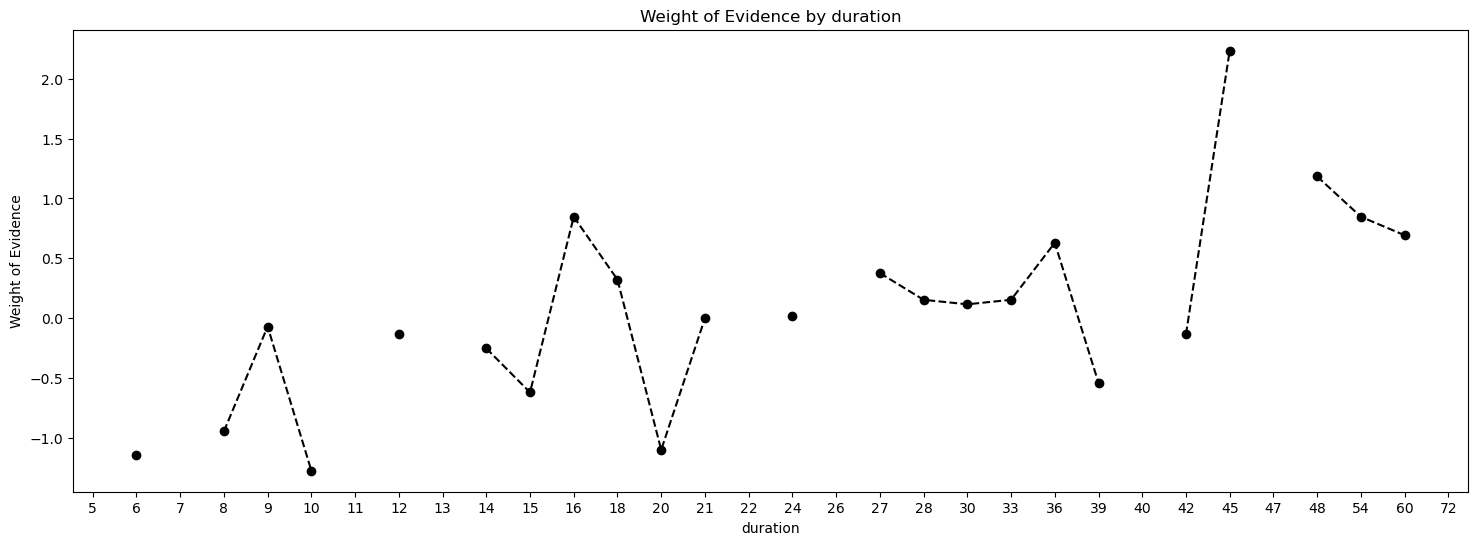

In [3805]:
plot_by_woe(df_temp)

In [3806]:
df['duration'] = pd.cut(df['duration'], bins=[0, 9, 12, 15, 20, 24, 33, 45, 100], 
                   labels=['0-9', '9-12', '12-15', '15-20', '20-24', '24-33', '33-45', 'bigger 45'])

In [3807]:
df_temp = woe_ordered_continuous(df, 'duration', df['default'])
df_temp

,duration,n_obs,prop_goods,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0-9,143,0.167832,0.143,24.0,119.0,0.080000,0.170000,-0.753772,NaN,NaN,0.248663
1,9-12,216,0.240741,0.216,52.0,164.0,0.173333,0.234286,-0.301325,0.072909,0.452447,0.248663
2,12-15,72,0.180556,0.072,13.0,59.0,0.043333,0.084286,-0.665290,0.060185,0.363965,0.248663
3,15-20,123,0.357724,0.123,44.0,79.0,0.146667,0.112857,0.262040,0.177168,0.927330,0.248663
4,20-24,216,0.300926,0.216,65.0,151.0,0.216667,0.215714,0.004405,0.056798,0.257634,0.248663
5,24-33,60,0.333333,0.060,20.0,40.0,0.066667,0.057143,0.154151,0.032407,0.149745,0.248663
6,33-45,105,0.438095,0.105,46.0,59.0,0.153333,0.084286,0.598402,0.104762,0.444251,0.248663
7,bigger 45,65,0.553846,0.065,36.0,29.0,0.120000,0.041429,1.063521,0.115751,0.465119,0.248663


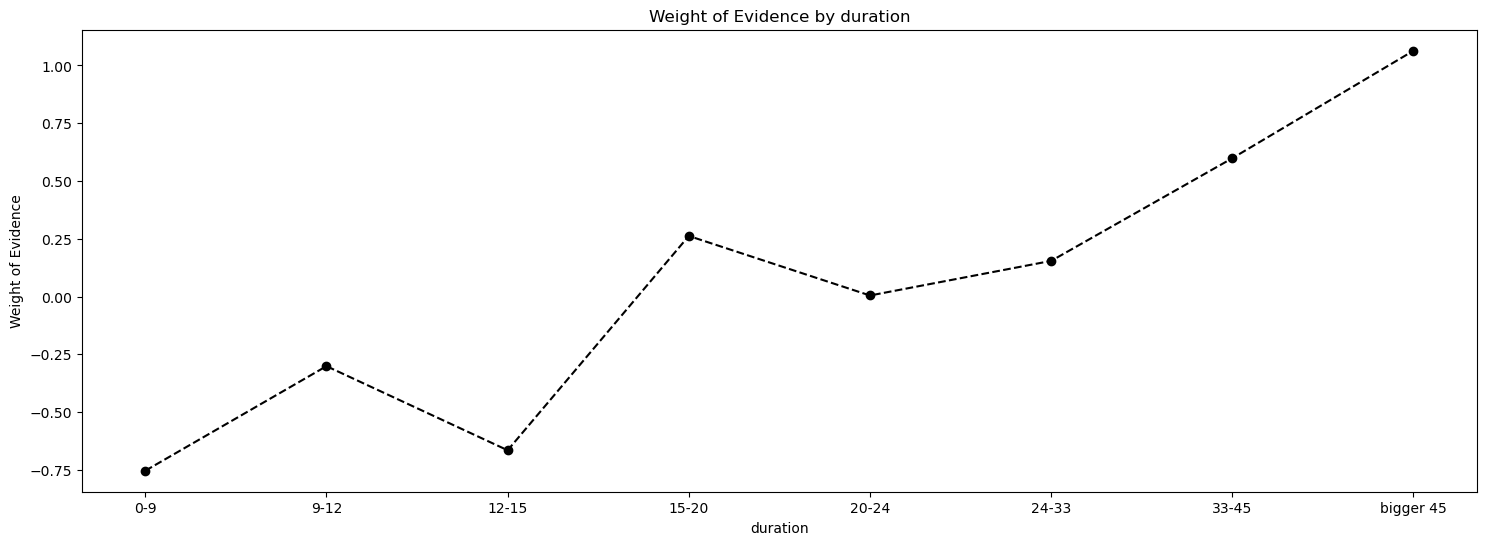

In [3808]:
plot_by_woe(df_temp)

In [3809]:
hierarchy = ['0-9', '9-12', '12-15', '15-20', '20-24', '24-33', '33-45', 'bigger 45']

In [3810]:
encoder = OrdinalEncoder(categories=[hierarchy], handle_unknown='use_encoded_value', unknown_value=-1)
df['duration'] = df['duration'].astype(str)
df['duration'] = encoder.fit_transform(df[['duration']])

Also for this variable we managed to create to linearity for model and reached a very good value of IV.

**loan_amt**

In [3813]:
df_temp = woe_ordered_continuous(df, 'loan_amt', df['default'])
df_temp

,loan_amt,n_obs,prop_goods,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,250,1,0.0,0.001,0.0,1.0,0.000000,0.001429,-inf,NaN,NaN,inf
1,276,1,0.0,0.001,0.0,1.0,0.000000,0.001429,-inf,0.0,NaN,inf
2,338,1,0.0,0.001,0.0,1.0,0.000000,0.001429,-inf,0.0,NaN,inf
3,339,1,0.0,0.001,0.0,1.0,0.000000,0.001429,-inf,0.0,NaN,inf
4,343,1,0.0,0.001,0.0,1.0,0.000000,0.001429,-inf,0.0,NaN,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
916,15653,1,0.0,0.001,0.0,1.0,0.000000,0.001429,-inf,1.0,inf,inf
917,15672,1,1.0,0.001,1.0,0.0,0.003333,0.000000,inf,1.0,inf,inf
918,15857,1,0.0,0.001,0.0,1.0,0.000000,0.001429,-inf,1.0,inf,inf
919,15945,1,1.0,0.001,1.0,0.0,0.003333,0.000000,inf,1.0,inf,inf


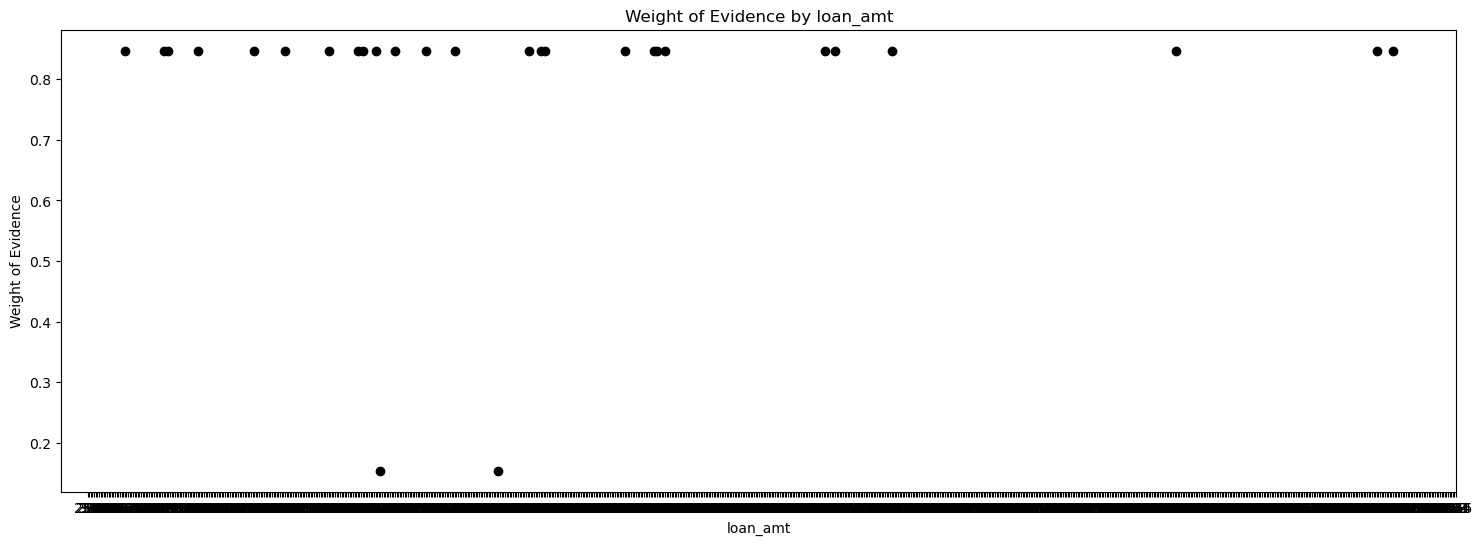

In [3814]:
plot_by_woe(df_temp)

In [3815]:
df['loan_amt'] = pd.cut(df['loan_amt'], bins=[0, 4000, 6000, 8000, 10000, 12000, 14000, 100000], 
                   labels=['0-4k', '4k-6k', '6k-8k', '8k-10k', '10k-12k', '12k-14k', 'bigger 14k'])

In [3816]:
df_temp = woe_ordered_continuous(df, 'loan_amt', df['default'])
df_temp

,loan_amt,n_obs,prop_goods,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0-4k,754,0.258621,0.754,195.0,559.0,0.650000,0.798571,-0.205852,NaN,NaN,0.153235
1,4k-6k,97,0.381443,0.097,37.0,60.0,0.123333,0.085714,0.363871,0.122823,0.569723,0.153235
2,6k-8k,79,0.379747,0.079,30.0,49.0,0.100000,0.070000,0.356675,0.001696,0.007196,0.153235
3,8k-10k,30,0.466667,0.030,14.0,16.0,0.046667,0.022857,0.713766,0.086920,0.357092,0.153235
4,10k-12k,19,0.526316,0.019,10.0,9.0,0.033333,0.012857,0.952658,0.059649,0.238892,0.153235
5,12k-14k,9,0.555556,0.009,5.0,4.0,0.016667,0.005714,1.070441,0.029240,0.117783,0.153235
6,bigger 14k,12,0.750000,0.012,9.0,3.0,0.030000,0.004286,1.945910,0.194444,0.875469,0.153235


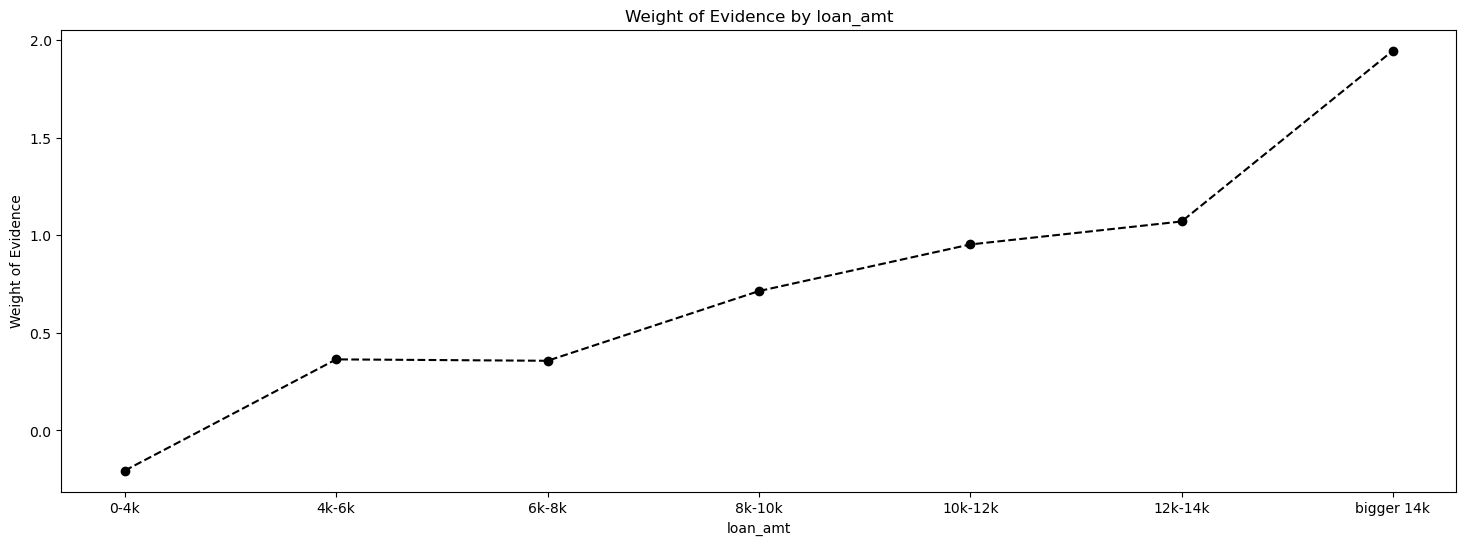

In [3817]:
plot_by_woe(df_temp)

In [3818]:
hierarchy = ['0-4k', '4k-6k', '6k-8k', '8k-10k', '10k-12k', '12k-14k', 'bigger 14k']

In [3819]:
encoder = OrdinalEncoder(categories=[hierarchy], handle_unknown='use_encoded_value', unknown_value=-1)
df['loan_amt'] = df['loan_amt'].astype(str)
df['loan_amt'] = encoder.fit_transform(df[['loan_amt']])

Exactly some very positive results as the ones achieved before with the other variables.

## Modeling - Logistic Regression

Logistic regression is a supervised learning algorithm used for binary classification. It predicts the probability that an input belongs to a specific class by modeling the relationship between features and the target using a logistic (sigmoid) function. The output is a probability, typically thresholded to classify data into two categories.

In our case case it will be applied to calculate whether an specific bank transaction should be a fraud or not, as already described enabling us to have a binary output or event a probability.

<img width='600px' src='logistic_regression.png' align='middle'>

*Image source: Data Mining Map*

In [3824]:
from sklearn.model_selection import train_test_split

seed = 42

Before start spliting the data for the model training, let's check if the dataset is according to our plans and expectations

In [3826]:
df.head(10)

,checking_acc_status,duration,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,present_residence_since,age,housing,num_curr_loans,job,num_people_provide_maint,default,internet,purpose:car_new_others,purpose:car_used,purpose:furniture_equipment,purpose:radio_tv,purpose:retraining,other_debtors_guarantors:co_applicant,other_debtors_guarantors:guarantor,other_debtors_guarantors:none,other_installment_plans:none,other_installment_plans:store_bank,property:car_or_life_insur,property:real_estate,property:unknown_or_no_property,personal_status:not_single,personal_status:single
0,3.0,0.0,0.0,1.0,0.0,4,4,10.0,0.0,2,0.0,1,0,0.0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1
1,2.0,7.0,1.0,2.0,2.0,2,2,0.0,0.0,1,0.0,1,1,1.0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0
2,0.0,1.0,0.0,2.0,1.0,2,3,9.0,0.0,1,1.0,2,0,1.0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1
3,3.0,6.0,2.0,2.0,1.0,2,4,8.0,2.0,1,0.0,2,0,1.0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1
4,3.0,4.0,1.0,2.0,2.0,3,4,9.0,2.0,2,0.0,2,1,1.0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1
5,0.0,6.0,3.0,1.0,2.0,2,4,6.0,2.0,1,1.0,2,0,0.0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1
6,0.0,4.0,0.0,4.0,0.0,3,4,9.0,0.0,1,0.0,1,0,1.0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1
7,2.0,6.0,2.0,2.0,2.0,2,2,6.0,1.0,1,2.0,1,0,0.0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1
8,0.0,1.0,0.0,0.0,1.0,2,4,10.0,0.0,1,1.0,1,0,1.0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0
9,2.0,5.0,1.0,2.0,4.0,4,2,3.0,0.0,2,2.0,1,1,1.0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0


In [3827]:
df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
checking_acc_status,1000.0,1.423,1.257638,0.0,0.0,2.0,3.0,3.0
duration,1000.0,2.978,2.160598,0.0,1.0,3.0,4.0,7.0
loan_amt,1000.0,0.538,1.164436,0.0,0.0,0.0,0.0,6.0
saving_acc_bonds,1000.0,1.950,0.853363,0.0,2.0,2.0,2.0,4.0
present_employment_since,1000.0,1.616,1.208306,0.0,0.0,2.0,2.0,4.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.0,4.0
present_residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.0,4.0
age,1000.0,5.026,2.915446,0.0,3.0,5.0,8.0,10.0
housing,1000.0,0.395,0.674856,0.0,0.0,0.0,1.0,2.0
num_curr_loans,1000.0,1.407,0.577654,1.0,1.0,1.0,2.0,4.0


After confirming that everything is as expected, wen can go ahead with the modeling and training steps

In [3829]:
X = df.drop(columns='default', axis=1)
y = df['default']

Considering that we have some class imbalance, when spliting the dataset into train and test sets is very impotant to apply the "stratify_y" resource

In [3831]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed)

In [3832]:
from sklearn.linear_model import LogisticRegression

In [3833]:
lr = LogisticRegression(max_iter=5000)

In [3834]:
model_lr = lr.fit(X_train, y_train)

In [3835]:
y_pred = model_lr.predict(X_test)

## Model evaluation - Logistic Regression

In [3837]:
from sklearn import metrics

Now it's finally time to evaluate if our model performed well, assessing its metrics, confusion matrix and ROC cuurve with AUC score

**Evaluation metrics**

In [3840]:
print('Accuracy:',round(metrics.accuracy_score(y_test, y_pred),5))
print('Precision:',round(metrics.precision_score(y_test, y_pred),5))
print('Recall:',round(metrics.recall_score(y_test, y_pred),5))
print('F1 Score:',round(metrics.f1_score(y_test, y_pred),5))

Accuracy: 0.77667
Precision: 0.66667
Recall: 0.51111
F1 Score: 0.57862


When evaluating the model performance metrics for the Logistic Regression with a "rare class", thinking about the occurance of default being much less common than the non occurance, we should give more importance to the Recall results, which is a very important metric for us (if not the most important).

In [3842]:
from sklearn.metrics import classification_report

In [3843]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       210
           1       0.67      0.51      0.58        90

    accuracy                           0.78       300
   macro avg       0.74      0.70      0.71       300
weighted avg       0.77      0.78      0.77       300



**Confusion matrix**

Importing the libraries

In [3846]:
import numpy as np
import matplotlib as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification

Instantiating, formating and displying the confusion matrix

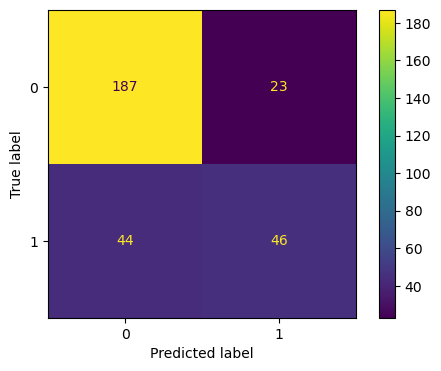

In [3848]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

**ROC Curve and AUC**

Calculating the metrics

In [3851]:
y_pred_proba = model_lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

Instantiating, formating and displying the ROC

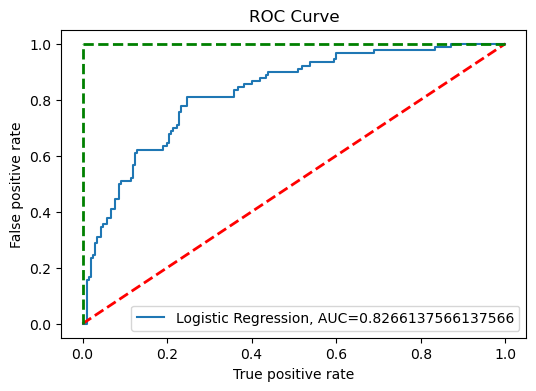

In [3853]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.plot(fpr, tpr, label = 'Logistic Regression, AUC='+str(auc))
plt.plot([0,1],[0,1], color = 'red', lw = 2, linestyle = '--');
plt.plot([0,0],[0,1], color = 'green', lw = 2, linestyle = '--');
plt.plot([0,1],[1,1], color = 'green', lw = 2, linestyle = '--');
plt.legend(loc = 4);
plt.title('ROC Curve');
plt.xlabel('True positive rate');
plt.ylabel('False positive rate');

## Setting a different threshold - Model evaluation - Logistic Regression

When looking at the metrics of our model, we saw clearly that the *Recall* measure, the most import in study cases with rare classes such ours, is definetly not affordable and satisfatory. Because of that, we will now in some lines of code try to find another value of treshold for the Logistic Regression classifier, so that we can balance better the trade-off between detecting the as mucjìh risky borrowers as possible, affecting the lreation and approval of good borrowers as low as possible, trying not to disturb them with eventual reprovals, which would be very negative for the company. 

**Evaluation metrics**

In [3857]:
probs = model_lr.predict_proba(X_test)[:, 1]
threshold = 0.3
y_pred_lower_tresh = (probs >= threshold).astype(int)

In [3858]:
print('Accuracy:',round(metrics.accuracy_score(y_test, y_pred_lower_tresh),5))
print('Precision:',round(metrics.precision_score(y_test, y_pred_lower_tresh),5))
print('Recall:',round(metrics.recall_score(y_test, y_pred_lower_tresh),5))
print('F1 Score:',round(metrics.f1_score(y_test, y_pred_lower_tresh),5))

Accuracy: 0.76
Precision: 0.57031
Recall: 0.81111
F1 Score: 0.66972


When evaluating the model performance metrics for the Logistic Regression with a "rare class", thinking about the occurance of default being much less common than the non occurance, we should give more importance to the Recall results, which is a very important metric for us (if not the most important).

In [3860]:
print(classification_report(y_test, y_pred_lower_tresh))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       210
           1       0.57      0.81      0.67        90

    accuracy                           0.76       300
   macro avg       0.74      0.77      0.74       300
weighted avg       0.80      0.76      0.77       300



**Confusion matrix**

Instantiating, formating and displying the confusion matrix

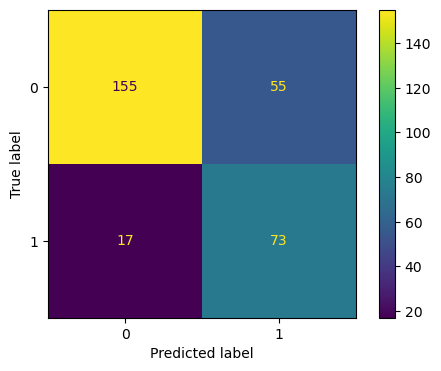

In [3863]:
cm = confusion_matrix(y_test, y_pred_lower_tresh)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

**ROC Curve and AUC**

Calculating the metrics

In [3866]:
#y_pred_proba = model_lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_lower_tresh)
auc = metrics.roc_auc_score(y_test, y_pred_lower_tresh)

Instantiating, formating and displying the ROC

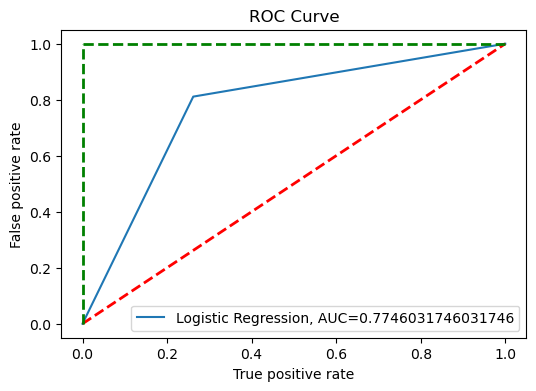

In [3868]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.plot(fpr, tpr, label = 'Logistic Regression, AUC='+str(auc))
plt.plot([0,1],[0,1], color = 'red', lw = 2, linestyle = '--');
plt.plot([0,0],[0,1], color = 'green', lw = 2, linestyle = '--');
plt.plot([0,1],[1,1], color = 'green', lw = 2, linestyle = '--');
plt.legend(loc = 4);
plt.title('ROC Curve');
plt.xlabel('True positive rate');
plt.ylabel('False positive rate');

## Predicting with and evaluating the final model on the whole dataset

Now it's time to see if the final model performs well (or at leats not much worse) in the whole dataset, including both train and test sets together.

In [3870]:
y_pred = model_lr.predict(X)

**Evaluation metrics**

In [3872]:
probs = model_lr.predict_proba(X)[:, 1]
threshold = 0.3
y_pred_lower_tresh = (probs >= threshold).astype(int)

In [3874]:
print('Accuracy:',round(metrics.accuracy_score(y, y_pred_lower_tresh),5))
print('Precision:',round(metrics.precision_score(y, y_pred_lower_tresh),5))
print('Recall:',round(metrics.recall_score(y, y_pred_lower_tresh),5))
print('F1 Score:',round(metrics.f1_score(y, y_pred_lower_tresh),5))

Accuracy: 0.734
Precision: 0.54009
Recall: 0.76333
F1 Score: 0.6326


When evaluating the model performance metrics for the Logistic Regression with a "rare class", thinking about the occurance of default being much less common than the non occurance, we should give more importance to the Recall results, which is a very important metric for us (if not the most important).

In [3877]:
print(classification_report(y, y_pred_lower_tresh))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       700
           1       0.54      0.76      0.63       300

    accuracy                           0.73      1000
   macro avg       0.71      0.74      0.71      1000
weighted avg       0.78      0.73      0.74      1000



**Confusion matrix**

Instantiating, formating and displying the confusion matrix

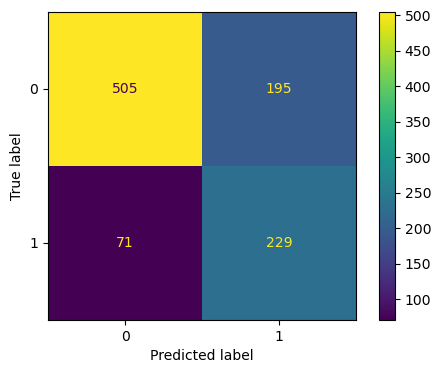

In [3879]:
cm = confusion_matrix(y, y_pred_lower_tresh)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

**ROC Curve and AUC**

Calculating the metrics

In [3885]:
#y_pred_proba = model_lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y, y_pred_lower_tresh)
auc = metrics.roc_auc_score(y, y_pred_lower_tresh)

Instantiating, formating and displying the ROC

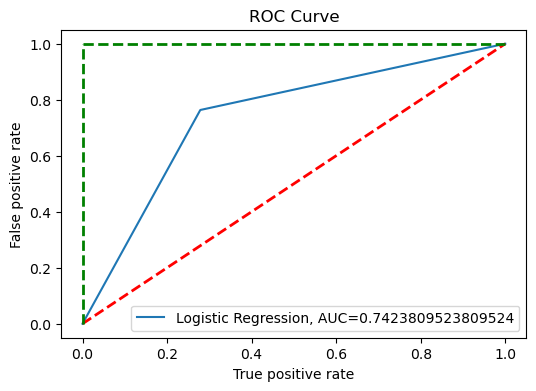

In [3888]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.plot(fpr, tpr, label = 'Logistic Regression, AUC='+str(auc))
plt.plot([0,1],[0,1], color = 'red', lw = 2, linestyle = '--');
plt.plot([0,0],[0,1], color = 'green', lw = 2, linestyle = '--');
plt.plot([0,1],[1,1], color = 'green', lw = 2, linestyle = '--');
plt.legend(loc = 4);
plt.title('ROC Curve');
plt.xlabel('True positive rate');
plt.ylabel('False positive rate');

From all the work we had on this dataset and project we can conclude that the results achieved are very positive but already improvable.

When comparing the metrics with the adjusted treshold on test and complete databases we can see we have worsen them in two cases (0.02 for Accuracy and 0.03 for Precision) and improved one (0.05 for Recall, what was defined by us as being the most import metric to take care about), that means at the end that the applicability of the model on the complete dataset was seen as very positive. 

From that we can conclude that our model have some improvement opportunities specially when thnking about the preparation of the variables (nonetheless we have achieved fantastic results with the application of WoE and IV techniques, such as label and one hot encoding) and that the model at the moment has no big issues about overfitting. 

## Evaluating the variable's significance and coefficients

Let's now have a deeper lokk at the model itself and the coefficients it has generated for each of the present variables.

In [3892]:
model_lr.intercept_

array([-4.41750381])

In [3894]:
model_lr.coef_

array([[ 0.60842867,  0.14457535,  0.24682271,  0.24054047,  0.17527871,
         0.25634601, -0.03016742, -0.04527216,  0.18232414,  0.09277938,
        -0.01342955,  0.27985218,  0.33539571,  0.47788986, -0.54937407,
         0.16408511,  0.08650124, -0.20671627,  0.30214064, -0.4843621 ,
         0.15460733, -0.41195257,  0.38433844, -0.06212878, -0.31149761,
         0.34601226,  0.29967308, -0.32728721]])

Our idea is to create a table to summarize them and to enable us also to create some visualization.

In [3896]:
feature_name = X_test.columns.values
feature_name.shape

(28,)

In [3898]:
summary_table = pd.DataFrame(columns = ['Feature Name'], data = feature_name)
summary_table

,Feature Name
0,checking_acc_status
1,duration
2,loan_amt
3,saving_acc_bonds
4,present_employment_since
5,installment_rate
6,present_residence_since
7,age
8,housing
9,num_curr_loans


In [3900]:
coefficients = np.transpose(model_lr.coef_)
coefficients.shape

(28, 1)

In [3902]:
coefficients = pd.Series(coefficients.flatten())

In [3904]:
coefficients.shape

(28,)

In [3908]:
summary_table['Coefficients'] = 0
summary_table.head(5)

,Feature Name,Coefficients
0,checking_acc_status,0
1,duration,0
2,loan_amt,0
3,saving_acc_bonds,0
4,present_employment_since,0


In [3910]:
summary_table['Coefficients'] = coefficients

In [3912]:
summary_table

,Feature Name,Coefficients
0,checking_acc_status,0.608429
1,duration,0.144575
2,loan_amt,0.246823
3,saving_acc_bonds,0.240540
4,present_employment_since,0.175279
5,installment_rate,0.256346
6,present_residence_since,-0.030167
7,age,-0.045272
8,housing,0.182324
9,num_curr_loans,0.092779


In [3914]:
summary_table.index = summary_table.index+1

In [3916]:
summary_table.loc[0] = ['Intercept', model_lr.intercept_[0]]

In [3918]:
summary_table = summary_table.sort_index()

In [3924]:
coefficients_sorted

,Feature Name,Coefficients
1,checking_acc_status,0.608429
14,purpose:car_new_others,0.477890
23,other_installment_plans:store_bank,0.384338
26,property:unknown_or_no_property,0.346012
13,internet,0.335396
19,other_debtors_guarantors:co_applicant,0.302141
27,personal_status:not_single,0.299673
12,num_people_provide_maint,0.279852
6,installment_rate,0.256346
3,loan_amt,0.246823


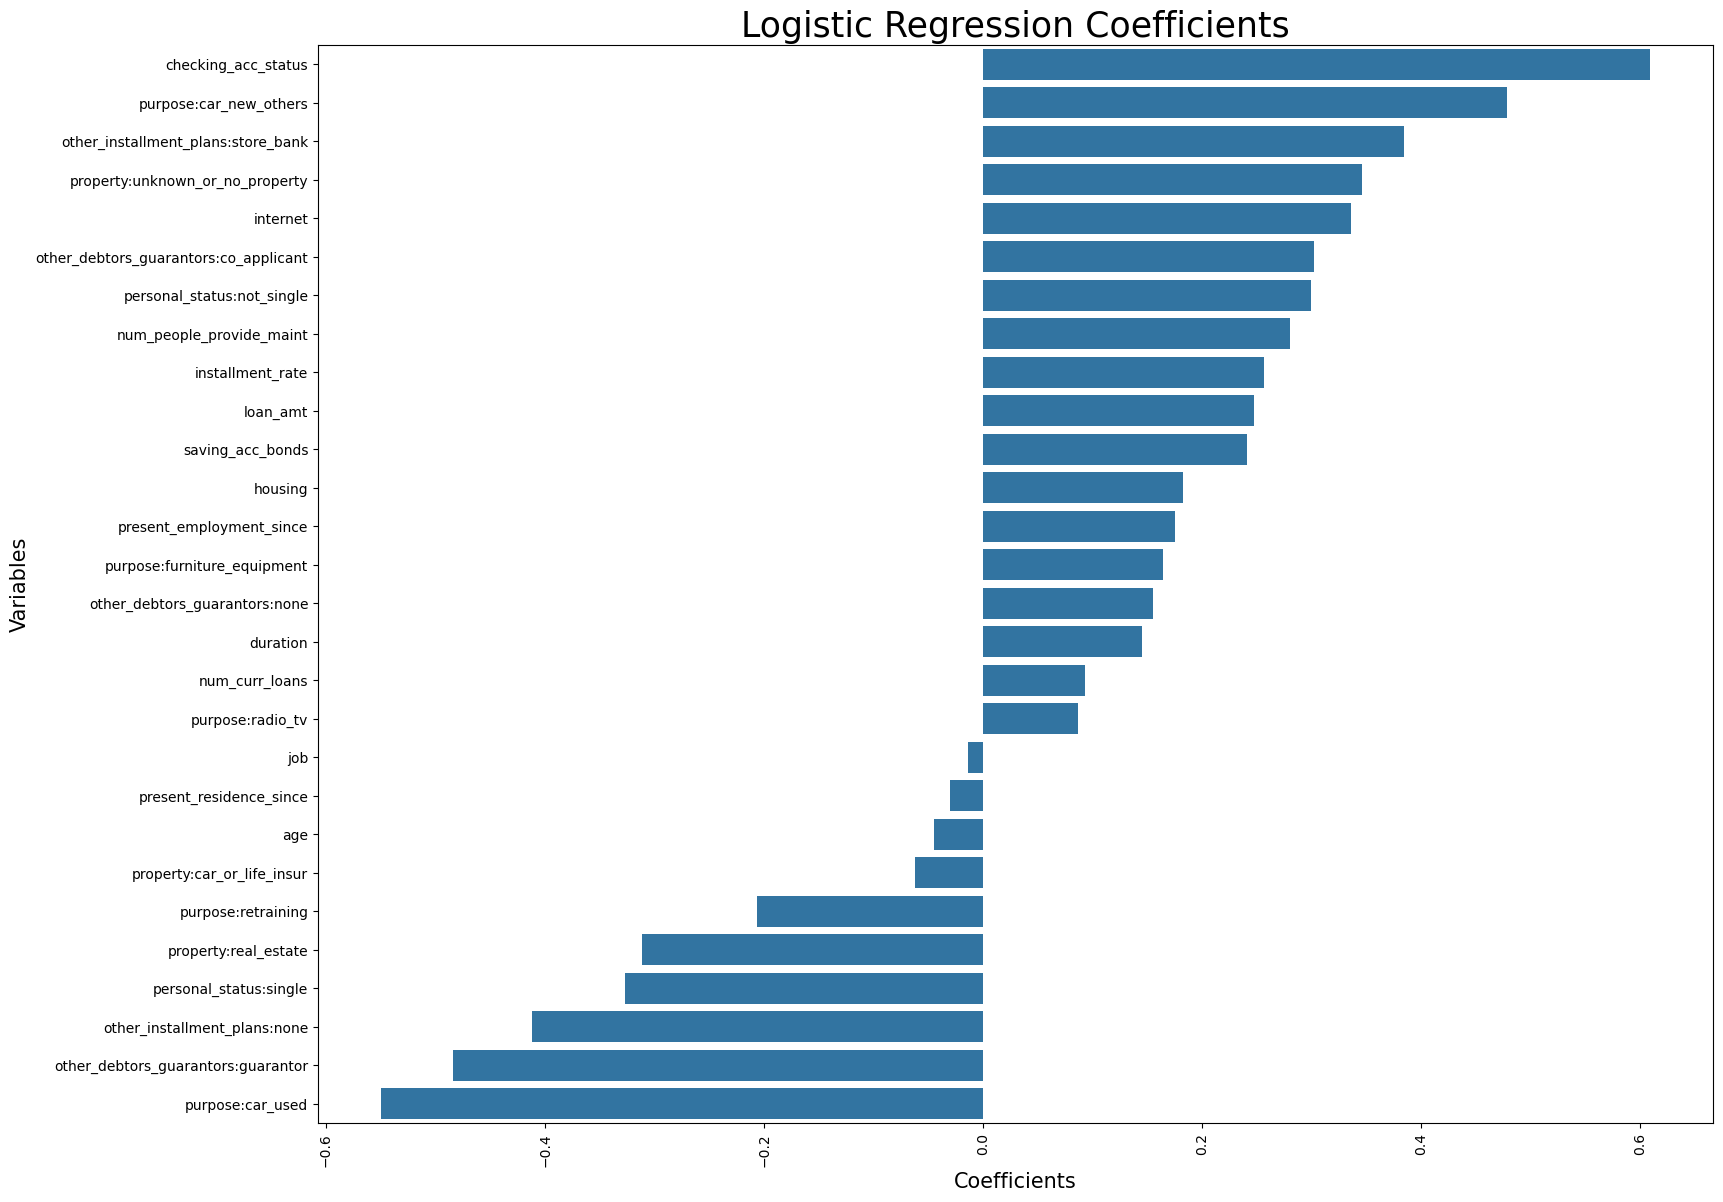

In [3930]:
coefficients_sorted = summary_table.sort_values(by='Coefficients', ascending=False)

plt.figure(figsize=(18,14))
sns.barplot(data=coefficients_sorted, y=coefficients_sorted['Feature Name'].iloc[:-1], x=coefficients_sorted['Coefficients'].iloc[:-1], );
plt.xticks(rotation=90,);
plt.title('Logistic Regression Coefficients', fontdict={'fontsize': 25});
plt.xlabel('Coefficients', fontdict={'fontsize': 15}) 
plt.ylabel('Variables', fontdict={'fontsize': 15})

plt.show()

In [3934]:
df_scorecard = summary_table

In [3936]:
df_scorecard['Original feature name'] = df_scorecard['Feature Name'].str.split(':').str[0]
df_scorecard

,Feature Name,Coefficients,Original feature name
0,Intercept,-4.417504,Intercept
1,checking_acc_status,0.608429,checking_acc_status
2,duration,0.144575,duration
3,loan_amt,0.246823,loan_amt
4,saving_acc_bonds,0.240540,saving_acc_bonds
5,present_employment_since,0.175279,present_employment_since
6,installment_rate,0.256346,installment_rate
7,present_residence_since,-0.030167,present_residence_since
8,age,-0.045272,age
9,housing,0.182324,housing


In [3938]:
min_score = 300
max_score = 850

In [ ]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

In [ ]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

In [ ]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

In [ ]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

In [ ]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

In [ ]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

In [ ]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

In [ ]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

In [ ]:
# One has to be subtracted from the maximum score for one original variable. Which one? We'll evaluate based on differences.

In [ ]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

In [ ]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][14] = 50
df_scorecard

In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

In [ ]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

inputs_test_with_ref_cat.head()

df_scorecard

inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [ ]:
scorecard_scores = df_scorecard['Score - Final']

In [ ]:
scorecard_scores.shape

In [ ]:
scorecard_scores = scorecard_scores.values.reshape(31, 1)

In [ ]:
scorecard_scores.shape

In [ ]:
y_scores = df_scorecard.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [ ]:
y_scores.head()

In [ ]:
y_scores.tail()